<a href="https://colab.research.google.com/github/zhkoss/Repo_1/blob/main/Projects/7_Prefabricated_learning/7_Prefabricated_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: Построение моделей, которые смогут предсказать уровень удовлетворённости сотрудника, а также уволится ли сотрудник из компании

## Введение

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли.

### Цель исследования

Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. <br>
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### Ход исследования

Требуется решить 2 задачи:

Задача 1: предсказание уровня удовлетворённости сотрудника<br>
Шаг 1. Загрузка данных<br>
Шаг 2. Предобработка данных<br>
Шаг 3. Исследовательский анализ данных<br>
Шаг 4. Подготовка данных<br>
Шаг 5. Обучение моделей<br>
Шаг 6. Оформление выводов<br>


Задача 2: предсказание увольнения сотрудника из компании <br>
Шаг 1. Загрузка данных<br>
Шаг 2. Предобработка данных<br>
Шаг 3. Исследовательский анализ данных<br>
Шаг 4. Добавление нового входного признака <br>
Шаг 5. Подготовка данных<br>
Шаг 6. Обучение модели<br>
Шаг 7. Выводы<br>

Общий вывод

## Задача №1. Предсказание уровня удовлетворённости сотрудника

### Загрузка данных

In [ ]:
!pip install phik -q

In [ ]:
!pip install shap -q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from patsy import dmatrices
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   RobustScaler,
                                   LabelEncoder
                                   )
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance

import phik
import shap

In [ ]:
# объявление констант
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [ ]:
# загрузка данных для Задачи №1
try:
    train_job_satisfaction_rate = pd.read_csv(
        '/datasets/train_job_satisfaction_rate.csv',
        decimal='.', sep=','
        )
    test_features = pd.read_csv(
        '/datasets/test_features.csv',
        decimal='.',
        sep=','
        )
    test_target_job_satisfaction_rate = pd.read_csv(
        '/datasets/test_target_job_satisfaction_rate.csv',
        decimal='.',
        sep=','
        )
except:
    train_job_satisfaction_rate = pd.read_csv(
        '//content/drive/MyDrive/Colab Notebooks/Sb_proekt_2/datasets/train_job_satisfaction_rate.csv',
        decimal='.',
        sep=','
        )
    test_features = pd.read_csv(
        '//content/drive/MyDrive/Colab Notebooks/Sb_proekt_2/datasets/test_features.csv',
        decimal='.',
        sep=','
        )
    test_target_job_satisfaction_rate = pd.read_csv(
        '//content/drive/MyDrive/Colab Notebooks/Sb_proekt_2/datasets/test_target_job_satisfaction_rate.csv',
        decimal='.',
        sep=','
        )

# загрузка данных для Задачи №2
try:
    train_quit = pd.read_csv(
        '/datasets/train_quit.csv',
        decimal='.',
        sep=','
        )
    test_target_quit = pd.read_csv(
        '/datasets/test_target_quit.csv',
        decimal='.',
        sep=','
        )
except:
    train_quit = pd.read_csv(
        '//content/drive/MyDrive/Colab Notebooks/Sb_proekt_2/datasets/train_quit.csv',
        decimal='.',
        sep=','
        )
    test_target_quit = pd.read_csv(
        '//content/drive/MyDrive/Colab Notebooks/Sb_proekt_2/datasets/test_target_quit.csv',
        decimal='.',
        sep=','
        )

- общий взгляд на данные:

In [ ]:
# Тренировочная выборка:
train_job_satisfaction_rate.head()

In [ ]:
# Входные признаки тестовой выборки:
test_features.head()

In [ ]:
# Целевой признак тестовой выборки:
test_target_job_satisfaction_rate.head()

- Просмотр данных о рассматриваемых DataFrame:

In [ ]:
print(train_job_satisfaction_rate.info())
print('-' * 100)
print(test_features.info())
print('-' * 100)
print(test_target_job_satisfaction_rate.info())

#### Выводы

Файлы с исходными данными открыты и изучены.

Данные в таблицах соответствуют описанию этих данных, однако требуется их предобработка.

### Предобработка данных

#### Изменение типов данных

Не требуется

#### Пропущенные значения

Пропущенные значения в train_job_satisfaction_rate:

In [ ]:
train_job_satisfaction_rate.isna().sum()

In [ ]:
display(train_job_satisfaction_rate.query('dept.isna() == True '))

display(train_job_satisfaction_rate.query('level.isna() == True '))

Посмотрим, как можно заполнить пропуски.<br>

Разбивка по зарплатам сотрудников с учетом уровня должности и отдела, в котором они работают:

In [ ]:
train_job_satisfaction_rate.groupby(['level', 'dept'])['salary'].median()

Разбивка по уровню занятости сотрудников с учетом уровня должности и отдела, в котором они работают:

In [ ]:
train_job_satisfaction_rate.groupby(['level', 'dept', 'workload'])['id'].count()

Видим, что у junior медианная з/п в 3 из 5 отделов одинакова. <br>
Сделаем допущения, что: <br>
-  если медианное значение з/п = 24 000, то сотрудник принадлежит к одному из отделов (hr, marketing, purchsing).
В датасете один такой сотрудник (id=814624). Уровень его загрузки - medium. Среди указанных отделов наибольшее число сотрудников, имеющих такую загрузку - у отдела purchsing. Заполним пропуск соответствующий отделом;
- если медианное значение з/п < 24 000, то сотрудник работает в отделе sales;
- если медианное значение з/п > 24 000, то сотрудник работает в отделе technology.

Пропуски такого же рода обнаружены также в test_features.
<br><br><br>
**Однако, по условию задачи требуется добавить заполнение пропусков в пайплайн. Следовательно, заполним пропуски на одном из следующих этапов с помощью SimpleImputer.**

#### Поиск и удаление дубликатов

##### Явные дубликаты

In [ ]:
print(
    'Количество дубликатов в train_job_satisfaction_rate:',
    train_job_satisfaction_rate.duplicated().sum()
    )
print(
    'Количество дубликатов в test_features:',
    test_features.duplicated().sum()
    )
print(
    'Количество дубликатов в test_target_job_satisfaction_rate:',
    test_target_job_satisfaction_rate.duplicated().sum()
    )

Объединим таблицы с тренировочными и тестовыми данными для поиска дубликатов:

In [ ]:
test_plus_goal = test_features.merge(test_target_job_satisfaction_rate, on='id')

pd.concat([train_job_satisfaction_rate, test_plus_goal]).duplicated().sum()

Дубликатов не обнаружено

##### Неявные дубликаты

In [ ]:
for column in train_job_satisfaction_rate.columns:
    print(column, train_job_satisfaction_rate[column].unique(), '\n')

In [ ]:
for column in test_features.columns:
    print(column, test_features[column].unique(), '\n')

В столбцах 'dept' и 'workload' выявлены пробелы:

In [ ]:
test_features.query('dept == " "')

Для корректной работы SimpleImputer заменим пробелы на np.nan:

In [ ]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features['workload'] = test_features['workload'].replace(' ', np.nan)
print(test_features['dept'].unique())
print(test_features['workload'].unique())

#### Выводы

В этом разделе была проведена предобработка данных:
- изменения типов данных не требуется;
- обнаружены пропуски (будут заменены в пайплайне с помощью SimpleImputer на этапе подготовки данных);
- явных дубликатов не обнаружено;
- при поиске неявных дубликатов обнаружены пробелы, которые были заменены на нечисло np.nan для корректной работы SimpleImputer.

### Исследовательский анализ данных

#### Описание данных:

In [ ]:
display(
    'Описание DataFrame train_job_satisfaction_rate:',
    train_job_satisfaction_rate.describe(include='all')
    )
display(
    'Описание DataFrame test_features:',
    test_features.describe(include='all')
    )
display(
    'Описание DataFrame test_target_job_satisfaction_rate:',
    test_target_job_satisfaction_rate.describe(include='all')
    )

#### Графики признаков

Разделение признаков на качественные и количественные:

In [ ]:
train_job_satisfaction_rate_num_cols = [
    'salary',
    'job_satisfaction_rate'
]

train_job_satisfaction_rate_cat_discr_cols = [
    'employment_years',
    'supervisor_evaluation'
]

train_job_satisfaction_rate_cat_cols = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
]

In [ ]:
test_features_num_cols = [
    'salary'
]

test_features_cat_discr_cols = [
    'employment_years',
    'supervisor_evaluation'
]

test_features_cat_cols = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
]

Посмотрим на графики распределения количественных признаков DataFrame train_job_satisfaction_rate и в test_job_satisfaction_rate:

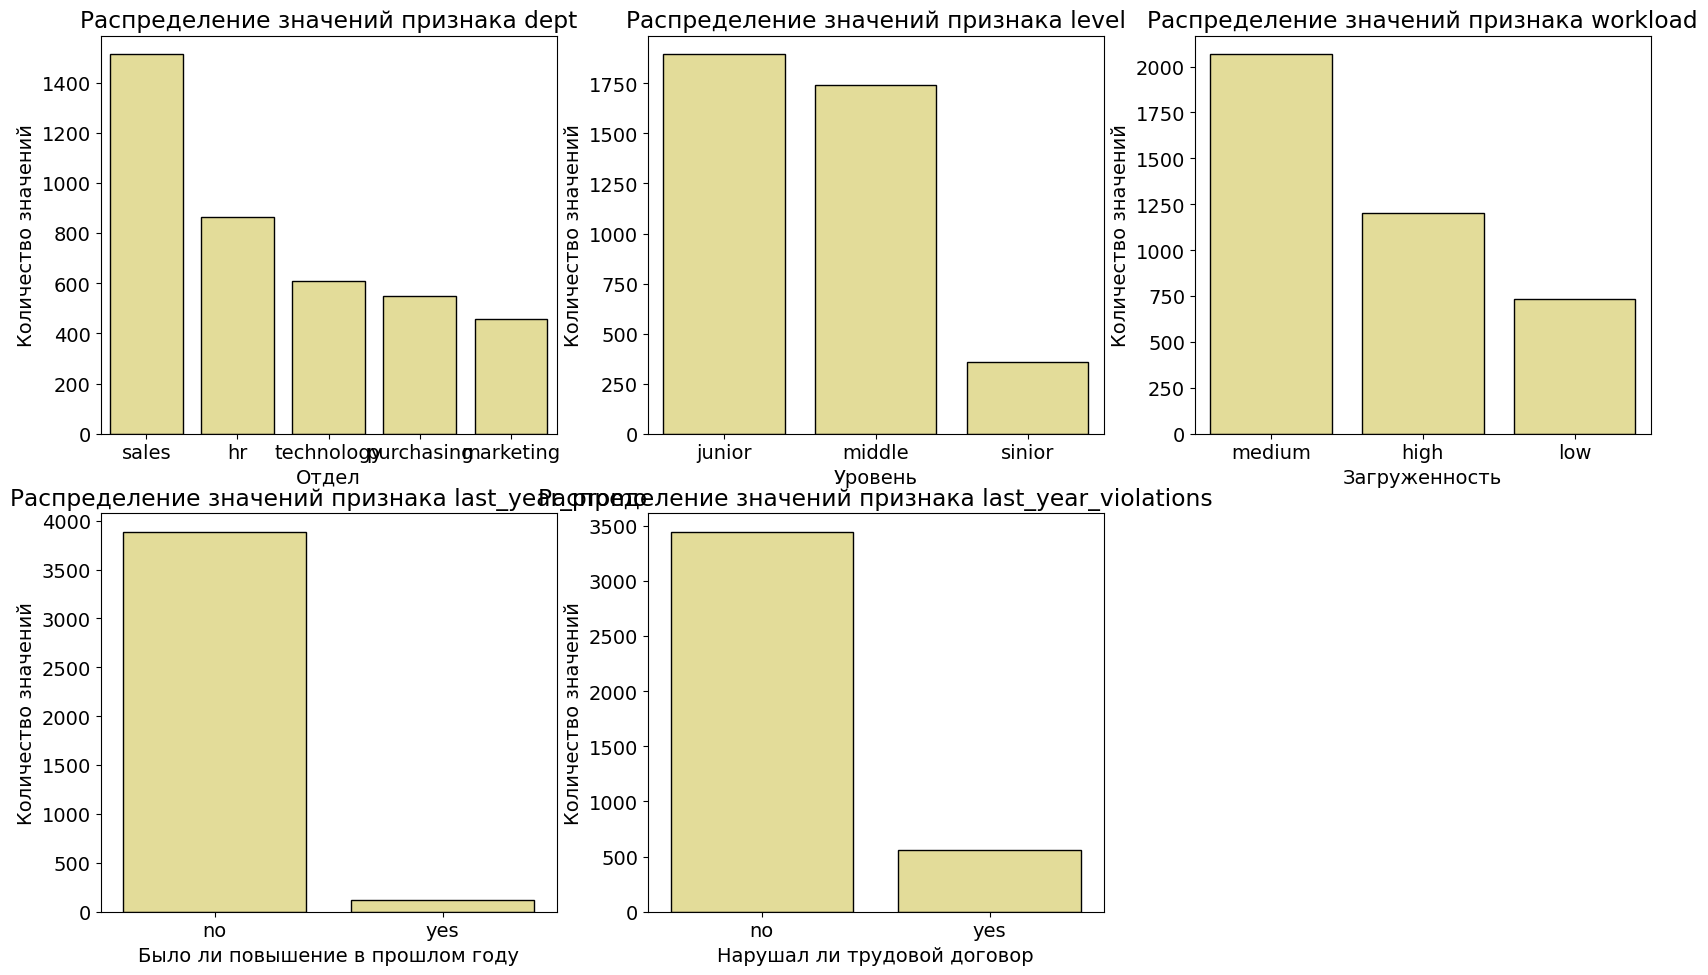

In [ ]:
fig = plt.figure(figsize=(20,30))

x_labels_1_1 = [
    'Отдел',
    'Уровень',
    'Загруженность',
    'Было ли повышение в прошлом году',
    'Нарушал ли трудовой договор'
]
total_axes = len(train_job_satisfaction_rate_cat_cols)
subplt = 1
for n, c in enumerate(train_job_satisfaction_rate[train_job_satisfaction_rate_cat_cols]):
    ax = fig.add_subplot(total_axes, 3, subplt, xlabel=x_labels_1_1[n])
    sns.barplot(
        x=train_job_satisfaction_rate[c].unique(),
        y=train_job_satisfaction_rate[c].value_counts(dropna=False),
        color='khaki',
        ec='black'
    )
    subplt += 1
    plt.title(f'Распределение значений признака {c}')
    plt.ylabel('Количество значений')
pass

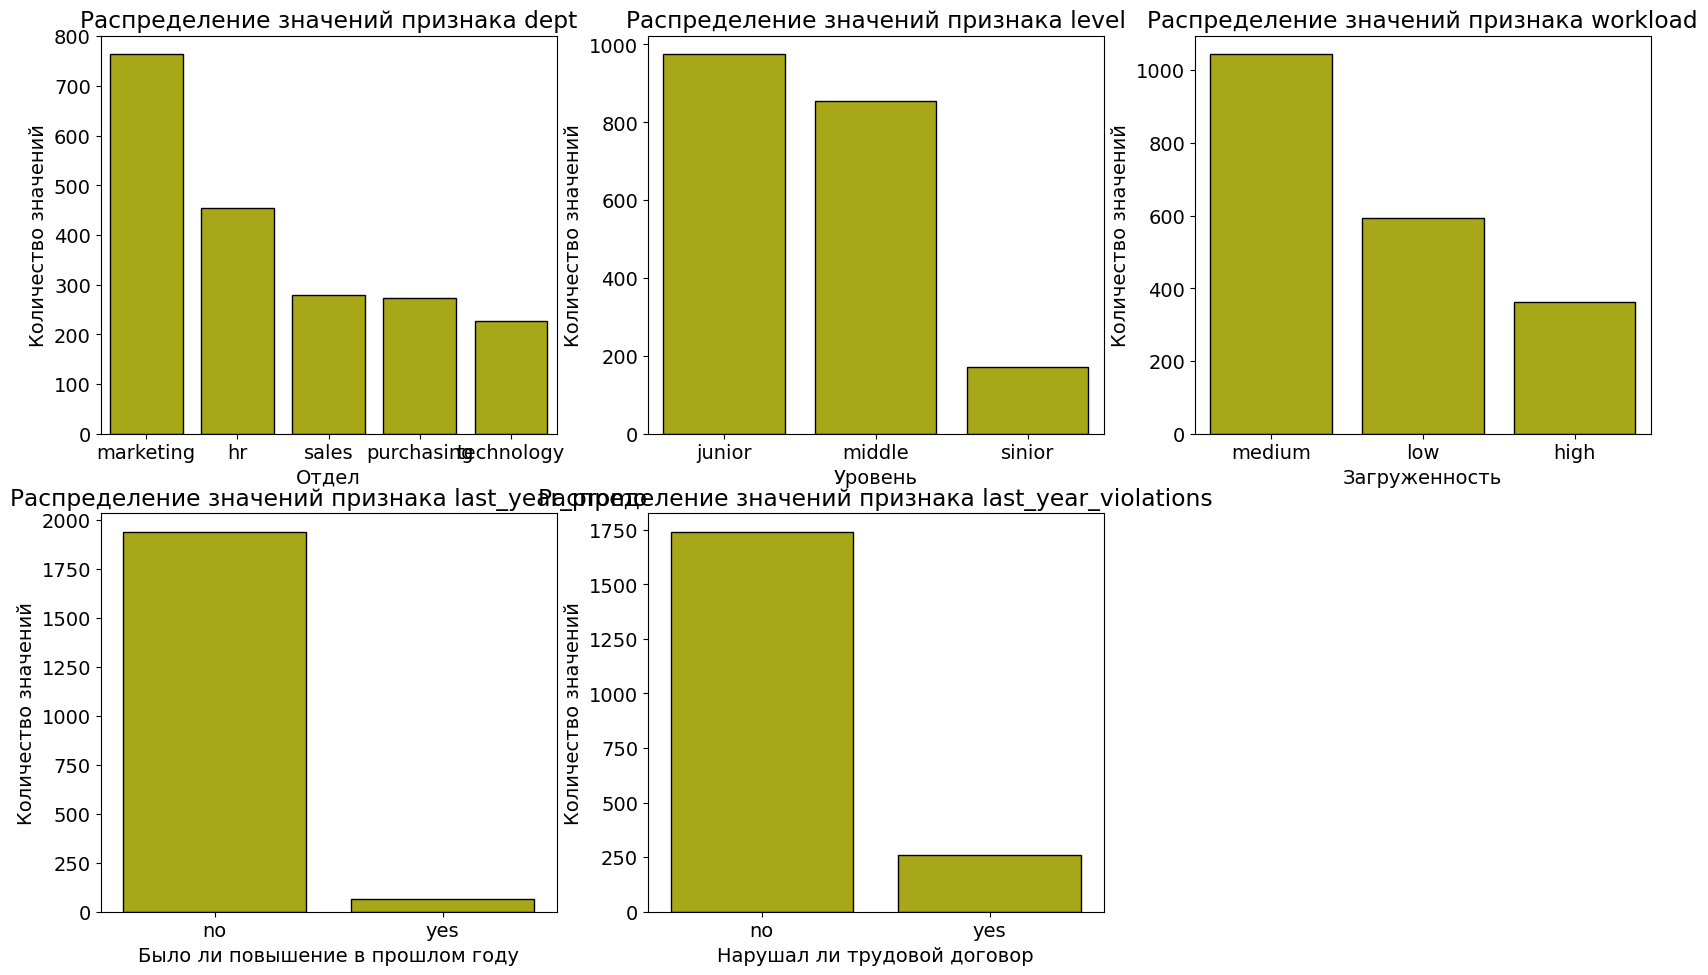

In [ ]:
fig = plt.figure(figsize=(20,30))

total_axes = len(test_features_cat_cols)
subplt = 1
for n, c in enumerate(test_features[test_features_cat_cols]):
    ax = fig.add_subplot(total_axes, 3, subplt, xlabel=x_labels_1_1[n])
    sns.barplot(
        x=test_features[c].unique(),
        y=test_features[c].value_counts(dropna=False),
        color='y',
        ec='black'
    )
    subplt += 1
    plt.title(f'Распределение значений признака {c}')
    plt.ylabel('Количество значений')
pass

Распределения дискретных категориальных признаков:

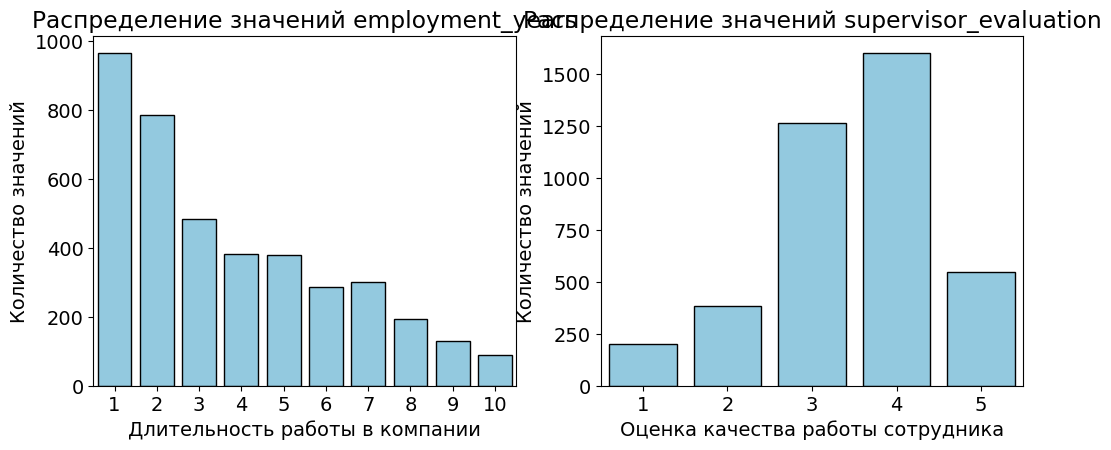

In [ ]:
x_labels_1_2 = [
    'Длительность работы в компании',
    'Оценка качества работы сотрудника'
]

fig = plt.figure(figsize=(12,10))

total_axes = len(train_job_satisfaction_rate_cat_discr_cols)
subplt = 1
for n, c in enumerate(train_job_satisfaction_rate[train_job_satisfaction_rate_cat_discr_cols]):
    ax = fig.add_subplot(total_axes, 2, subplt)
    sns.countplot(train_job_satisfaction_rate, x=c, color='skyblue', ec='black')
    subplt += 1
    plt.title(f'Распределение значений {c}')
    plt.xlabel(x_labels_1_2[n])
    plt.ylabel('Количество значений')
pass

Тренировочная и тестовая выборки не стратифицированы судя по столбцам 'dept', 'workload'.

Наблюдения:
- Senior'ов сильно меньше, чем middle и junior;
- мало кого повышали за последний год;
- мало кто нарушал трудовой договор за последний год;
- красивое убывающее распределение стажа работы в компании;
- чаще всего сотрудникам ставят '4'.

Построим графики для количественных признаков (гистограммы и boxplot'ы) DataFrame test_job_satisfaction_rate и test_job_satisfaction_rate:

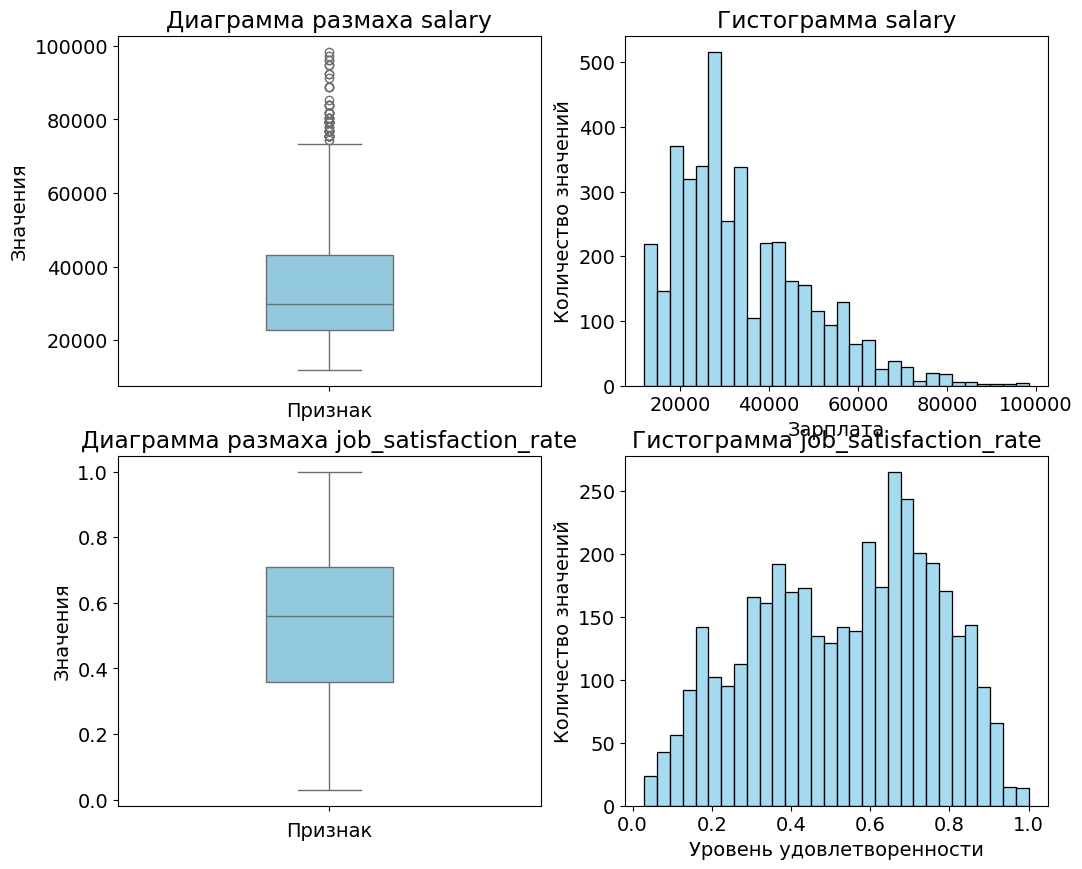

In [ ]:
x_labels_1_3 = [
    'Зарплата',
    'Уровень удовлетворенности'
]

fig = plt.figure(figsize=(12,10))

total_axes = len(train_job_satisfaction_rate_num_cols)
subplt = 1
for n, c in enumerate(train_job_satisfaction_rate[train_job_satisfaction_rate_num_cols]):
    ax = fig.add_subplot(total_axes, 2, subplt)
    sns.boxplot(y=train_job_satisfaction_rate[c], color='skyblue', width=.3)
    subplt += 1
    plt.title(f'Диаграмма размаха {c}')
    plt.xlabel('Признак')
    plt.ylabel('Значения')
    ax = fig.add_subplot(total_axes, 2, subplt)
    sns.histplot(train_job_satisfaction_rate[c], color='skyblue', ec='black', bins=30)
    subplt += 1
    plt.title(f'Гистограмма {c}')
    plt.xlabel(x_labels_1_3[n])
    plt.ylabel('Количество значений')
pass

Распределения значений не похожи на нормальные. Есть выбросы в значениях:

In [ ]:
print(train_job_satisfaction_rate.query('salary > 70000').shape)

Выбросов в 'salary ~2%. Удалять не будем, чтобы не обеднять датасет.

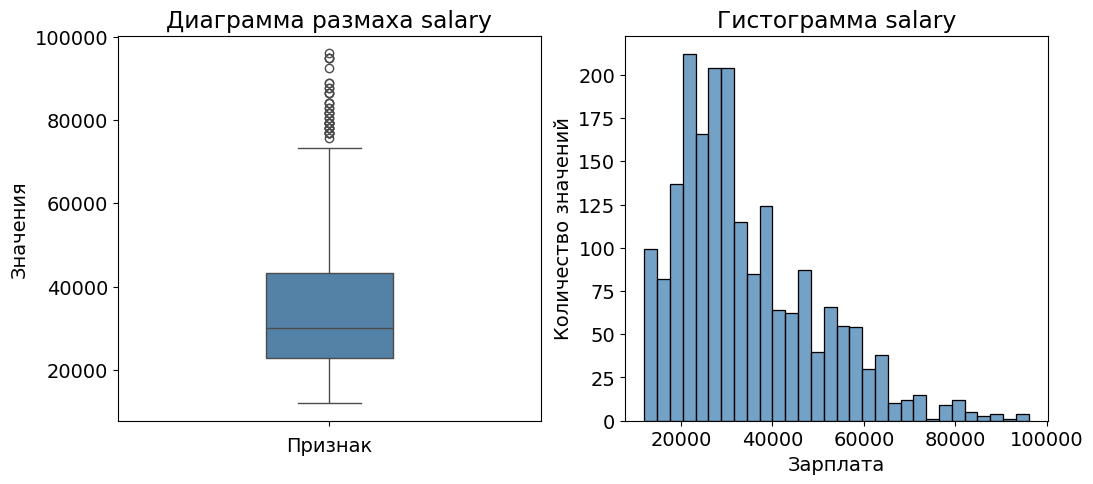

In [ ]:
fig = plt.figure(figsize=(12,5))

total_axes = len(test_features_num_cols)
subplt = 1
for n, c in enumerate(test_features[test_features_num_cols]):
    ax = fig.add_subplot(total_axes, 2, subplt)
    sns.boxplot(y=test_features[c], color='steelblue', width=.3)
    subplt += 1
    plt.title(f'Диаграмма размаха {c}')
    plt.xlabel('Признак')
    plt.ylabel('Значения')
    ax = fig.add_subplot(total_axes, 2, subplt)
    sns.histplot(test_features[c], color='steelblue', ec='black', bins=30)
    subplt += 1
    plt.title(f'Гистограмма {c}')
    plt.xlabel(x_labels_1_3[n])
    plt.ylabel('Количество значений')
pass

In [ ]:
print(test_features.query('salary > 70000').shape)

Количество выбросов, соответственно, примерно такое же, как и в предыдущем DataFrame.

Распределение целевого признака в тестовой выборке:

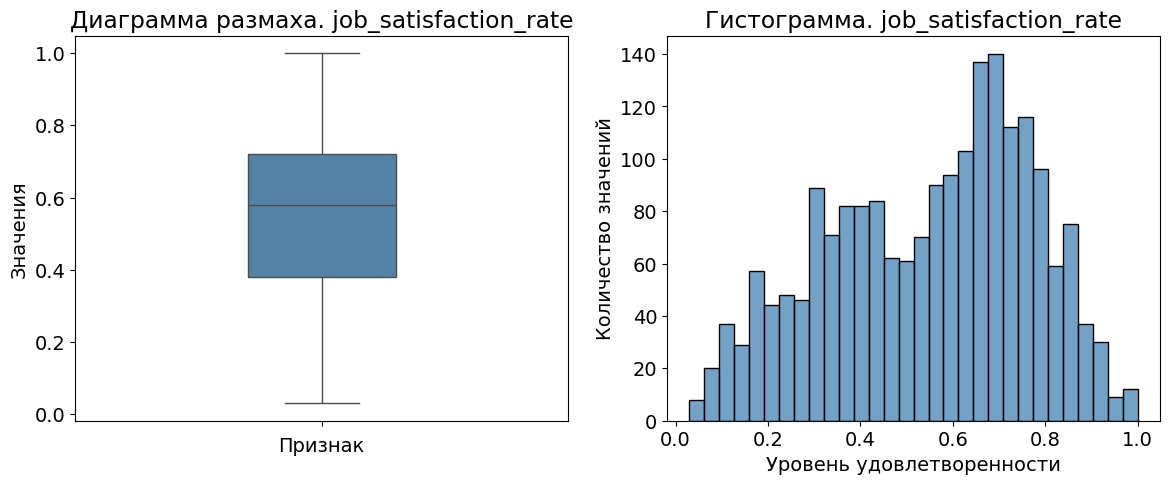

In [ ]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1, 2, 1)
sns.boxplot(y=test_target_job_satisfaction_rate['job_satisfaction_rate'], color='steelblue', width=.3)
plt.title(f'Диаграмма размаха. job_satisfaction_rate')
plt.xlabel('Признак')
plt.ylabel('Значения')

ax = fig.add_subplot(1, 2, 2)
sns.histplot(x=test_target_job_satisfaction_rate['job_satisfaction_rate'], color='steelblue', bins=30)

plt.title(f'Гистограмма. job_satisfaction_rate')
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Количество значений')
pass

#### Корреляционный анализ

Используем коэффициент корреляции фи, который учитывает категориальные признаки, а также ненормальность распределения данных:

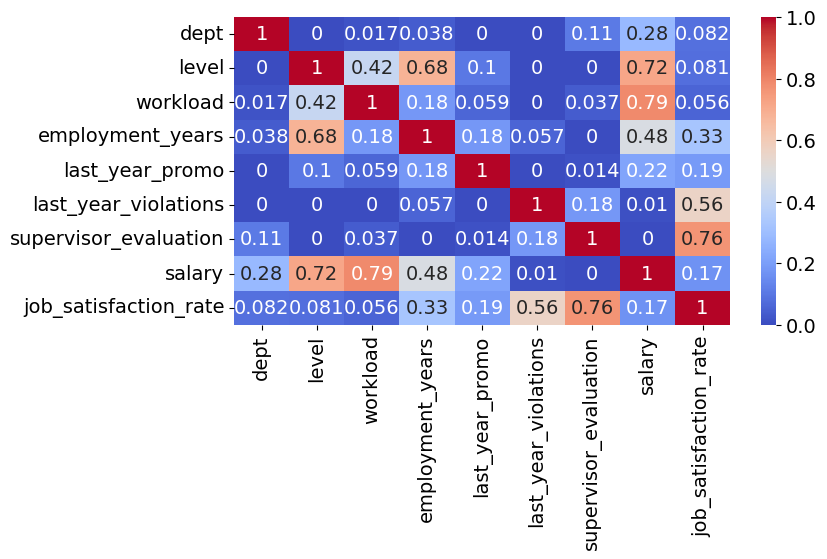

In [ ]:
fig = plt.figure(figsize=(8, 4))

sns.heatmap(
    train_job_satisfaction_rate.drop('id', axis=1).phik_matrix(interval_cols=train_job_satisfaction_rate_num_cols),
    cmap='coolwarm',
    annot=True,
    fmt='.2g'
)
pass

Матрицы корреляций с учетом подгрупп (используем коэффициент корреляции Спирмена) :

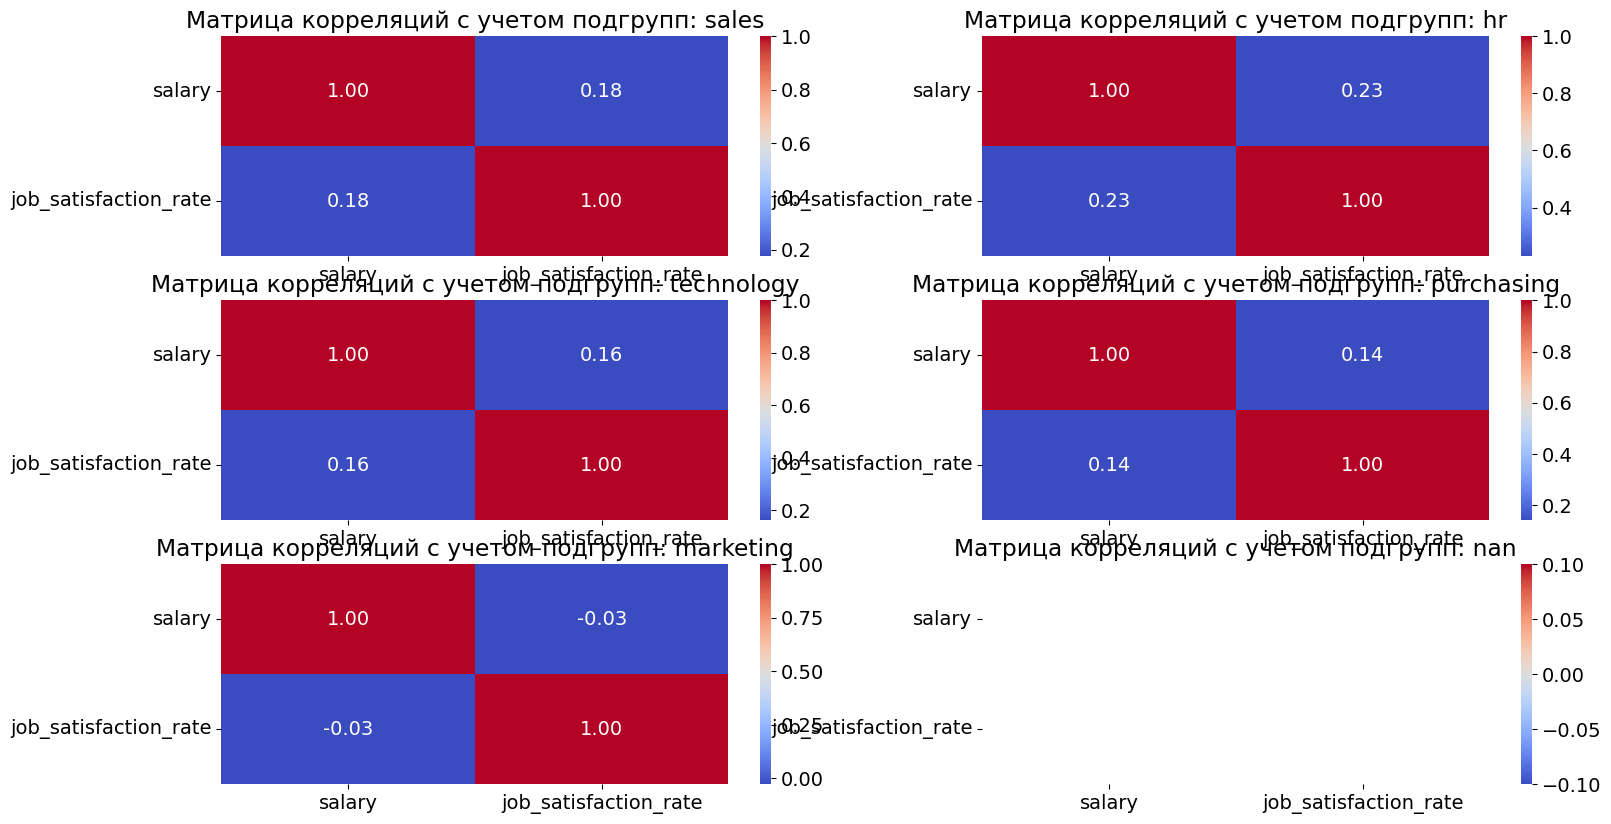

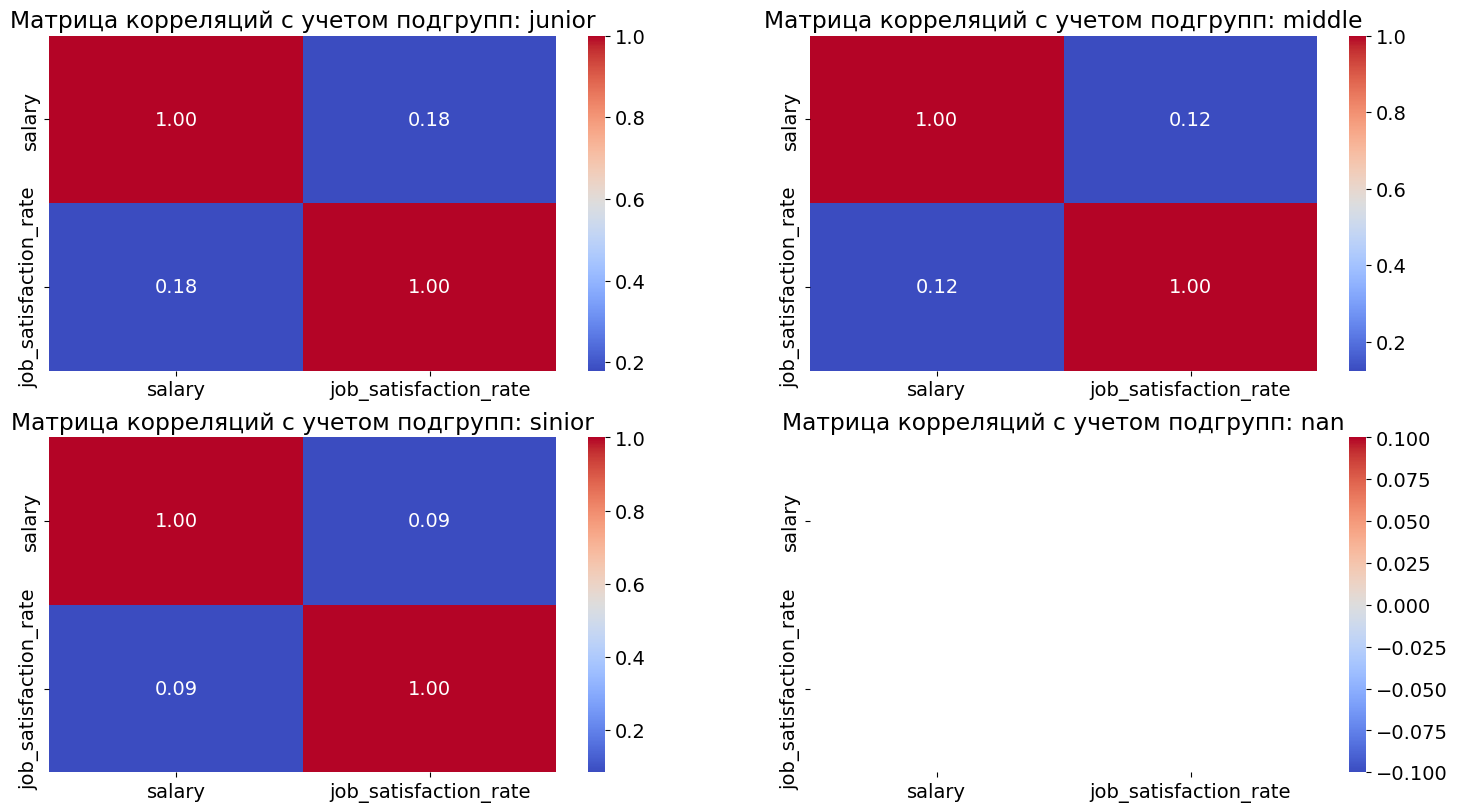

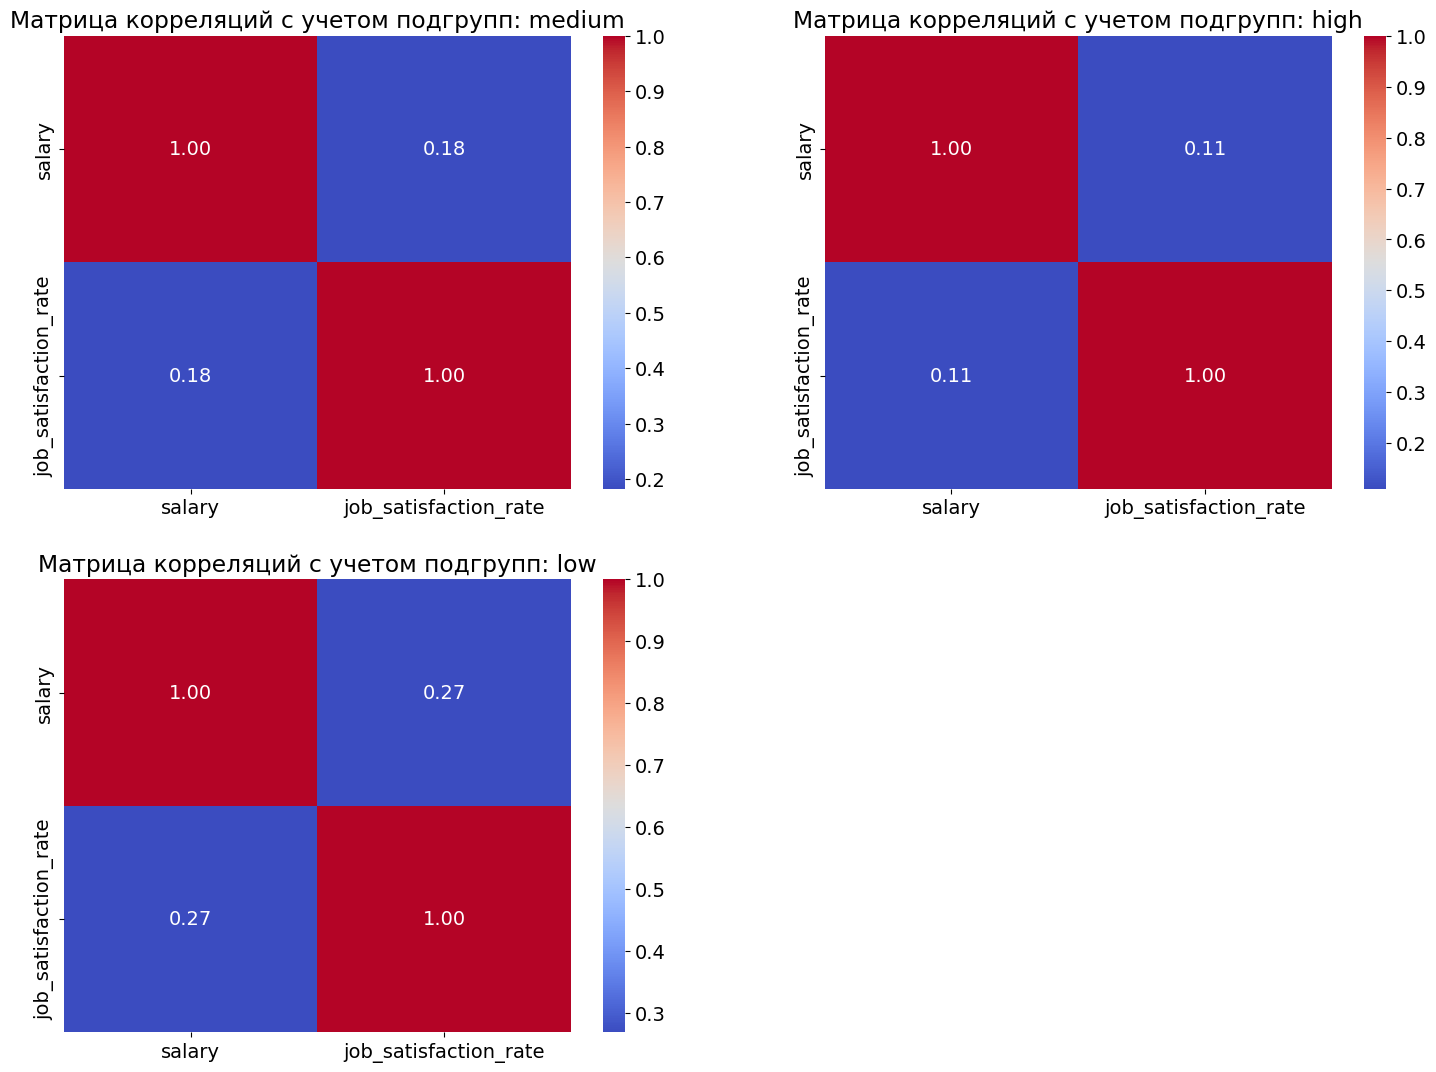

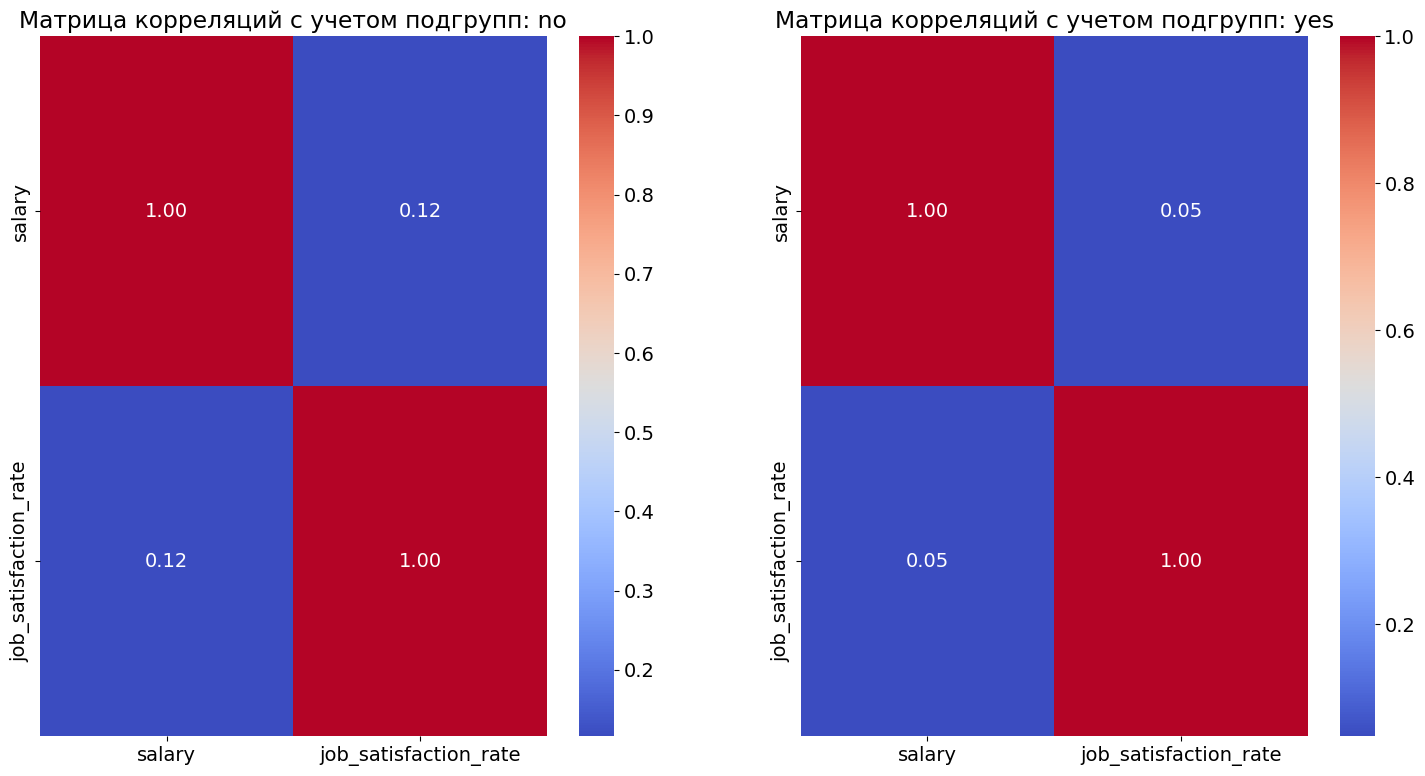

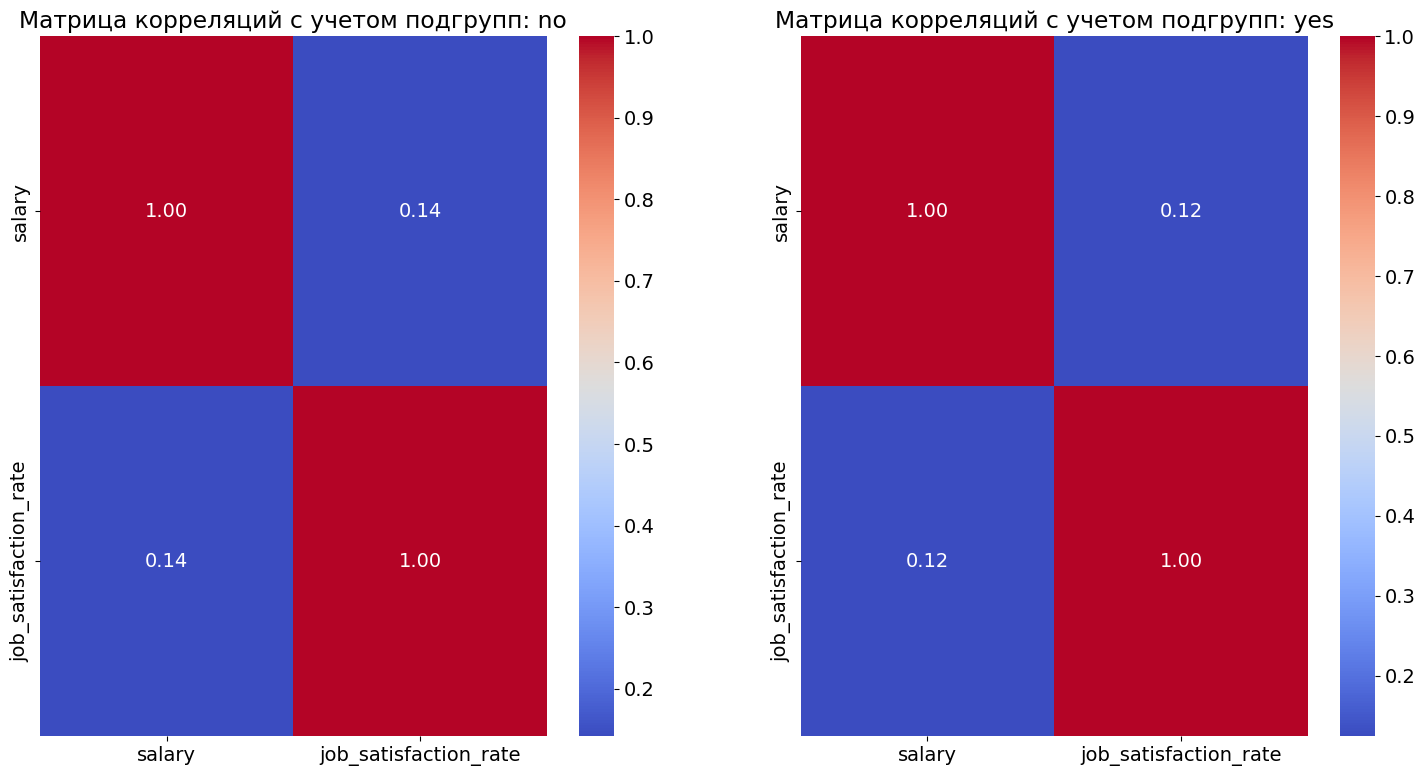

In [ ]:
def make_corr_matrix(categorical):
    fig = plt.figure(figsize=(18,20))

    total_axes = len(train_job_satisfaction_rate[categorical].unique())
    subplt = 1
    for c in train_job_satisfaction_rate[categorical].unique():
        ax = fig.add_subplot(total_axes, 2, subplt)
        sns.heatmap(
        train_job_satisfaction_rate[train_job_satisfaction_rate[categorical] == c][train_job_satisfaction_rate_num_cols].corr(method='spearman'),
        cmap='coolwarm',
        annot=True,
        fmt='.2f',
        )
        subplt += 1
        plt.title(f'Матрица корреляций с учетом подгрупп: {c}')

for d in train_job_satisfaction_rate_cat_cols:
    make_corr_matrix(d)

Построим диаграммы рассеяния для целевого признака и всех количественных признаков с учётом значения категориальных признаков.

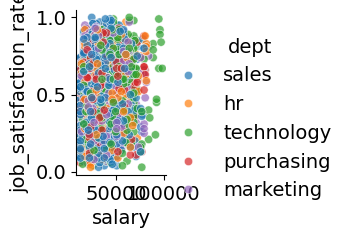

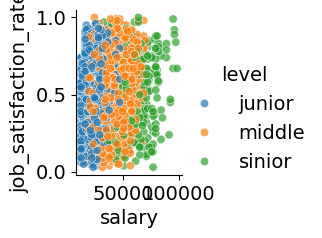

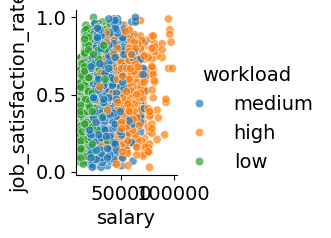

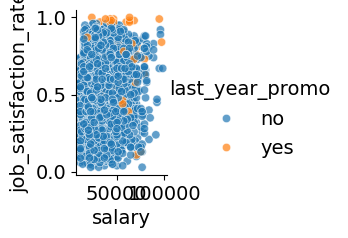

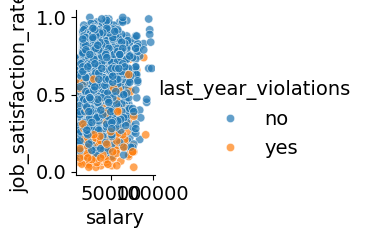

In [ ]:
for category in train_job_satisfaction_rate_cat_cols:
    g = sns.PairGrid(train_job_satisfaction_rate, hue=category, x_vars=train_job_satisfaction_rate_num_cols[:-1], y_vars='job_satisfaction_rate')
    g.map(sns.scatterplot, alpha=0.7)
    g.add_legend()
pass

Между уровнем удовлетворенности и оценкой руководителя (как показывали ранее матрицы корреляций) действительно есть какая-то зависимость. Чем выше оценка руководителем, тем выше уровень удовлетворенности сотрудника. Но зависимость не совсем линейная.<br>
Более загруженные работники получают бОльшую з/п.<br>
Те, кто получил повышение за последний год (помним, что их немного) вне зависимости от оценки руководителем.<br>
Сотрудники, допустившие нарушение договора, в целом менее счастливы вне зависимости от количества лет, отданных комании, оценки руководителем, а также уровня заработной платы.

Судя по матрицам корреляций, мультиколлинеарности не наблюдается (о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю). Проведем дополнительное исследование на мультиколлинеарность с помощью VIF (Variance Inflation Factor):

In [ ]:
# Использовуем job_satisfaction_rate в качестве целевой переменной
y, X = dmatrices('job_satisfaction_rate ~ dept+level+workload+last_year_promo+last_year_violations+employment_years+supervisor_evaluation+salary', \
                 data=train_job_satisfaction_rate, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

Значения >5 указывают на мультиколлинеарность между независимыми переменными. В данном случае есть значения выше 5. Особенно выделяется salary и workload. Согласно матрице корреляции (коэф. фи) взаимосвязь этих признаков было равна 0.79. <br>
Значение Intersept игнорируем, он не имеет значения для модели.<br>
Уберем из расчета признак workload, как наименее коррелирующий с целевым признаком:

In [ ]:
# Используем job_satisfaction_rate в качестве целевой переменной
y, X = dmatrices('job_satisfaction_rate ~ dept+level+last_year_promo+last_year_violations+employment_years+supervisor_evaluation+salary', \
                 data=train_job_satisfaction_rate, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

Теперь значения VIF < 5.

#### Дополнительное исследование признака supervisor_evaluation

Попробуем возвести в квадрат признак supervisor_evaluation и проверим будет ли он лучше описываться прямой

In [ ]:
def create_lr(x_lr, y_lr, c):

    #линия регрессии
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_lr, y_lr)
    line = slope * x_lr + intercept

    fig = plt.figure(figsize=(10,4))

    plt.scatter(x_lr, y_lr, s=10)
    plt.plot(x_lr, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.plot([], [], ' ', label='R_sq = '+'{:.4f}'.format(r_value**2))

    plt.grid(True)
    plt.title(f'График линейной регрессии зависимости Уровень удовлетворенности-{c}')
    plt.legend(fontsize=12)
    plt.xlabel(c)
    plt.ylabel('Уровень удовлетворенности')
    plt.show()

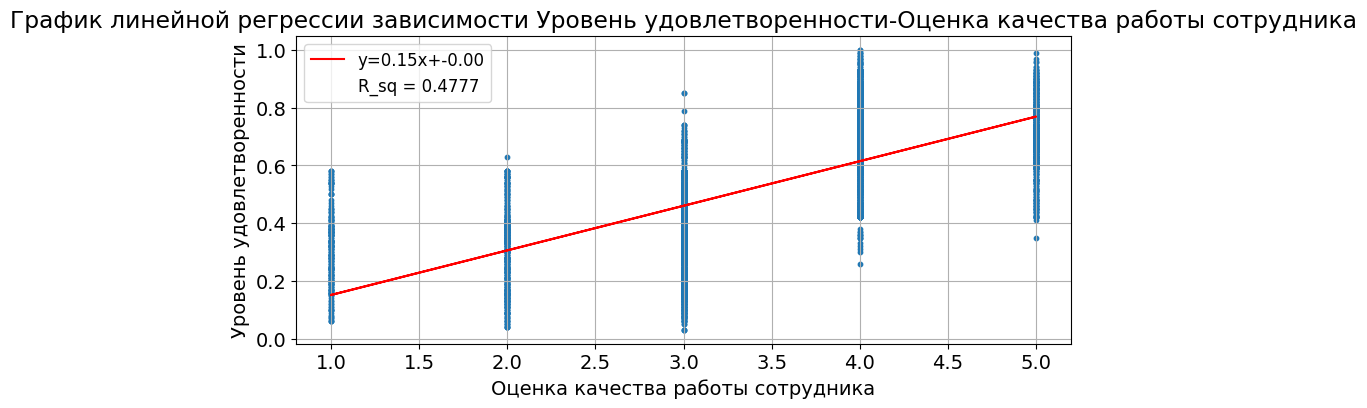

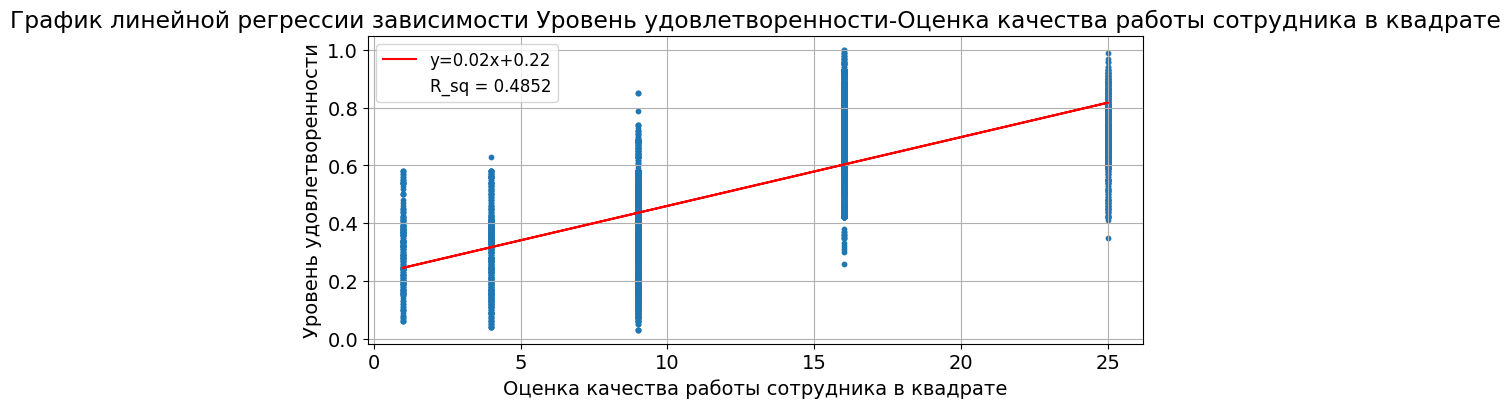

In [ ]:
x_lr = train_job_satisfaction_rate['supervisor_evaluation'].astype('float')
x_lr2 = (train_job_satisfaction_rate['supervisor_evaluation'] ** 2).astype('float')
y_lr = train_job_satisfaction_rate['job_satisfaction_rate'].astype('float')

create_lr(x_lr, y_lr, 'Оценка качества работы сотрудника')
create_lr(x_lr2, y_lr, 'Оценка качества работы сотрудника в квадрате')

R_sq (r в квадрате) признака supervisor_evaluation^2 больше, чем r_sq зависимости признаков supervisor_evaluation. Значит зависимость supervisor_evaluation^2 несколько лучше описывается прямой. <br>

In [ ]:
train_job_satisfaction_rate['supervisor_evaluation_sq'] = train_job_satisfaction_rate['supervisor_evaluation'] ** 2
test_features['supervisor_evaluation_sq'] = test_features['supervisor_evaluation'] ** 2


train_job_satisfaction_rate_new = train_job_satisfaction_rate.drop('supervisor_evaluation', axis=1)
test_features_new = test_features.drop('supervisor_evaluation', axis=1)

Проверим на мультиколлинеарность, убрав изначальный признак:

In [ ]:
# Используем job_satisfaction_rate в качестве целевой переменной
y, X = dmatrices('job_satisfaction_rate ~ dept+level+last_year_promo+last_year_violations+employment_years+supervisor_evaluation_sq+salary', \
                 data=train_job_satisfaction_rate, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

Значение VIF < 5. Но пока не будем удалять столбец workload. Посмотрим, какую значимость он будет иметь в моделях. Забегая вперед, оказалось, что наличие признака workload улучшает качество модели.

#### Выводы

Был проведен исследовательский анализ данных. Выяснилось, что:

Тренировочная и тестовая выборки не стратифицированы судя по столбцам 'dept', 'workload'.

Наблюдения:
- Senior'ов сильно меньше, чем middle и junior;
- мало кого повышали за последний год;
- мало кто нарушал трудовой договор за последний год.
- у некоторых признаков есть выбросы  значениях. Однако, их решено было оставить.
- распределения признаков не похожи на нормальные.

Корреляционный анализ показал, что чежду уровнем удовлетворенности и оценкой руководителя есть зависимость. Чем выше оценка руководителем, тем выше уровень удовлетворенности сотрудника. Но зависимость не совсем линейная. <br>
Более загруженные работники получают бОльшую з/п.<br>
Те, кто получил повышение за последний год (помним, что их немного) вне зависимости от оценки руководителем.<br>
Сотрудники, допустившие нарушение договора, в целом менее счастливы вне зависимости от количества лет, отданных комании, оценки руководителем, а также уровня заработной платы.

Матрицы корреляций не показали мультиколлинеарности между признаками. Однако, дополнительное исследование на мультиколлинеарность с помощью VIF (Variance Inflation Factor) показало ее наличие.

Также был возведен в квадрат признак  supervisor_evaluation. и проверено, будет ли он лучше описываться прямой. Так и вышло.

### Подготовка данных

Объединим test_features и test_target_job_satisfaction_rate по id, чтобы посмотреть, одни и те же id использованы в этих данных или нет:

In [ ]:
test_features_plus_target = test_features_new.merge(test_target_job_satisfaction_rate, on='id', how='left')
test_features_plus_target.shape

In [ ]:
test_features_plus_target.isna().sum()

Те же самые пропуски, которые были ранее.

In [ ]:
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation_sq', 'salary']

In [ ]:
# удалим столбец id, сделав из него индекс
train_job_satisfaction_rate_new = train_job_satisfaction_rate_new.set_index('id')
print(
    'Количество дубликатов в тренировочной выборке:',
    train_job_satisfaction_rate_new.duplicated().sum()
    )

test_features_plus_target = test_features_plus_target.set_index('id')
print(
    'Количество дубликатов в тестовой выборке:',
    test_features_plus_target.duplicated().sum()
    )

In [ ]:
# удаление дубликатов, получающееся после удаления id немного ухудшают модель. Закомментил код
#train_job_satisfaction_rate_new.drop_duplicates(inplace=True)
#test_features_plus_target.drop_duplicates(inplace=True)

In [ ]:
# разбивка данных
X_train = train_job_satisfaction_rate_new.drop('job_satisfaction_rate', axis=1)
y_train = train_job_satisfaction_rate_new['job_satisfaction_rate']

X_test = test_features_plus_target.drop('job_satisfaction_rate', axis=1)
y_test = test_features_plus_target['job_satisfaction_rate']

In [ ]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

### Обучение модели

In [ ]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# handle_unknown='ignore' - повлиял на целевую метрику лучше, чем со значением error
ohe_pipe = Pipeline(
    [
     ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [ ]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
    ]
)

In [ ]:
# создадим список для перебора гиперпараметров
param_grid = [
        # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,40),
        'models__max_features': range(2,40),
        'models__min_samples_split': range(2, 40),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [ ]:
# создадим функцию, которая будет описывать метрику SMAPE
def smape(y_true, y_pred):
  return 100 / len(y_true) * ((np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)).sum())

# создадим на ее основе метрику
smape_score = make_scorer(score_func=smape, greater_is_better=False)

In [ ]:
%%time
# выбор сделан в пользу RandomizedSearch за скорость его работы и хорошие результаты
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_score,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=10,
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации:', randomized_search.best_score_ * (-1))

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape(y_test, y_test_pred)}', '\n')

In [ ]:
# вывод лучшей модели
the_best_model = randomized_search.best_estimator_['models']

In [ ]:
# предобработка данных и вывод имен новых признаков после кодирования ohe. Создание DataFrame
X_train_prepr = pd.DataFrame(
    randomized_search.best_estimator_['preprocessor'].fit_transform(X_train),
    columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()
)

X_test_prepr = pd.DataFrame(
    randomized_search.best_estimator_['preprocessor'].transform(X_test),
    columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()
)

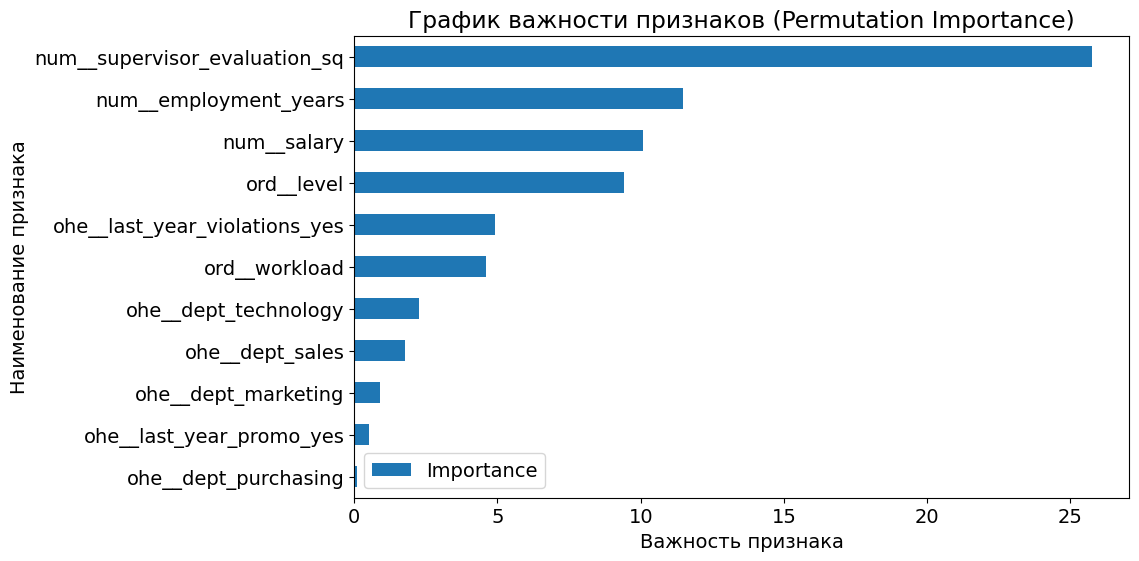

In [ ]:
permutation = permutation_importance(the_best_model, X_test_prepr, y_test, scoring=smape_score)

#X_test_prepr.columns[selector.get_support(indices=True)]
feature_importance = pd.DataFrame({'Feature': X_test_prepr.columns, 'Importance': permutation['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

plt.title(f'График важности признаков (Permutation Importance)')
plt.xlabel('Важность признака')
plt.ylabel('Наименование признака')

Также посмотрим на признаки с помощью SHAP-значений:

In [ ]:
# используем Explainer. Во избежание ошибки размерности массива используем shap_values[...,0]
explainer = shap.Explainer(the_best_model)
shap_values = explainer(X_test_prepr)
#explainer.feature_names = randomized_search.best_estimator_['preprocessor'].get_feature_names_out()

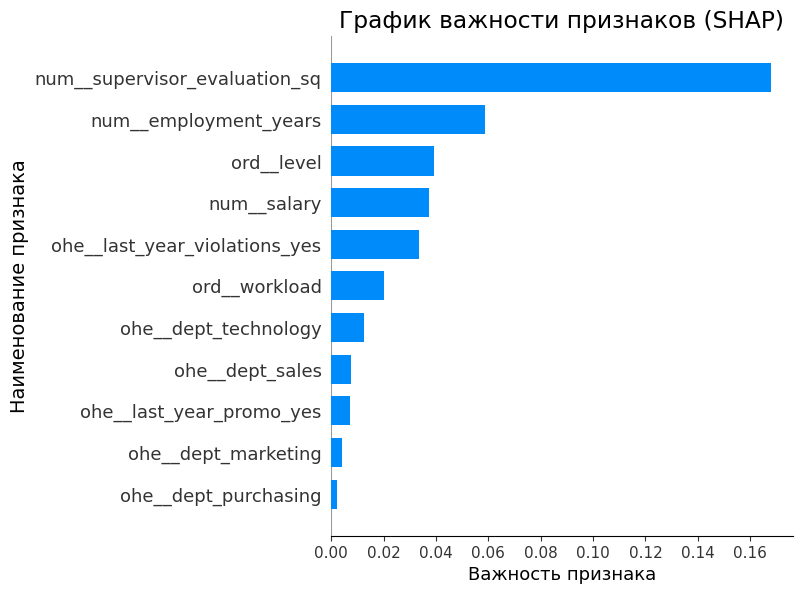

In [ ]:
shap.summary_plot(shap_values, plot_type='bar', show=False)

fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel("Важность признака")
ax.set_ylabel("Наименование признака")
ax.set_title('График важности признаков (SHAP)')

Важность первых 5 признаков у permutation importance и у SHAP одинаковы.
Самый важный - оценка сотрудника руководителем в квадрате.


### Выводы по первой части проекта

С целью решения задачи №1 была проведена предобработка данных, исследовательский и корреляционный анализ. Далее проведена подготовка данных к моделированию с помощью пайплайна, обучено 2 модели с перебором гиперпараметров. Далее на основе метрики SMAPE (на тестовой выборке имеет значение < 15) выбрана лучшая из них.

Лучше всего с задачей справилась модель **Дерево решений (DecisionTreeRegressor)**. Ее параметры: max_depth=32, max_features=19, min_samples_split=12 random_state=42.

Анализ важности признаков с помощью SimpleImputer и SHAP значений дал ценную информацию о том, на какие признаки стоит обратить бОльшее внимание в дальнейшем.


Данная модель справилось лучше линейной регрессии потому, что она оптимизирована с помощью гиперпараметров.

## Задача №2. Предсказание увольнения сотрудника из компании

### Загрузка данных

In [ ]:
# Тренировочная выборка (DataFrame загружен в п.2.1):
train_quit.head()

In [ ]:
# Тестовая выборка аналогична выборке из Задачи №1

In [ ]:
# Целевой признак тестовой выборки (DataFrame загружен в п.2.1):
test_target_quit.head()

Просмотр данных о DataFrame:

In [ ]:
print(train_quit.info())
print('-' * 100)
print(test_features.info())
print('-' * 100)
print(test_target_quit.info())

#### Выводы

Файлы с исходными данными открыты и изучены.

Данные в таблицах соответствуют описанию этих данных, однако требуется их предобработка.

### Предобработка данных

#### Изменение типов данных

Не требуется

#### Пропущенные значения

Пропущенные значения в тренировочной выборке:

In [ ]:
train_quit.isna().sum()

Пропущенные значения в тестовой выборке. Т.к. эта таблица была и в предыдущей задаче, ничего не изменилось. Пропуски будут заполнены с помощью SimpleImputer.

Пропущенные значения в целевом признаке:

In [ ]:
test_target_quit.isna().sum()

#### Поиск и удаление дубликатов

##### Явные дубликаты

In [ ]:
print(
    'Количество дубликатов в train_quit:',
    train_quit.duplicated().sum()
    )
print(
    'Количество дубликатов в test_features:',
    test_features.duplicated().sum()
    )
print(
    'Количество дубликатов в test_target_quit:',
    test_target_quit.duplicated().sum()
    )

##### Неявные дубликаты

Объединим таблицы с тренировочными и тестовыми данными для поиска дубликатов:

In [ ]:
test_plus_goal_2 = test_features.merge(test_target_quit, on='id')

pd.concat([train_quit, test_plus_goal_2]).duplicated().sum()

Дубликатов не обнаружено

In [ ]:
for column in train_quit.columns:
    print(column, train_quit[column].unique(), '\n')

неявных дубликатов не обнаружено.

Тестовая выборка входных данных осталась прежней.

#### Выводы

В этом разделе была проведена предобработка данных:
- изменения типов данных не требуется;
- пропусков в новых данных не обнаружено;
- явных и неявных дубликатов не обнаружено.

### Исследовательский анализ данных

#### Описание данных:

In [ ]:
display(
    'Описание DataFrame train_quit:',
    train_quit.describe(include='all')
    )
display(
    'Описание DataFrame test_features:',
    test_features.describe(include='all')
    )
display(
    'Описание DataFrame test_target_quit:',
    test_target_quit.describe(include='all')
    )

#### Графики признаков

In [ ]:
# разбивка признаков для тренировочных данных
train_quit_num_cols = [
    'salary'
]

train_quit_cat_discr_cols = [
    'employment_years',
    'supervisor_evaluation'
]

train_quit_cat_cols = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations',
    'quit'
]

Посмотрим на графики распределения количественных признаков DataFrame train_quit:

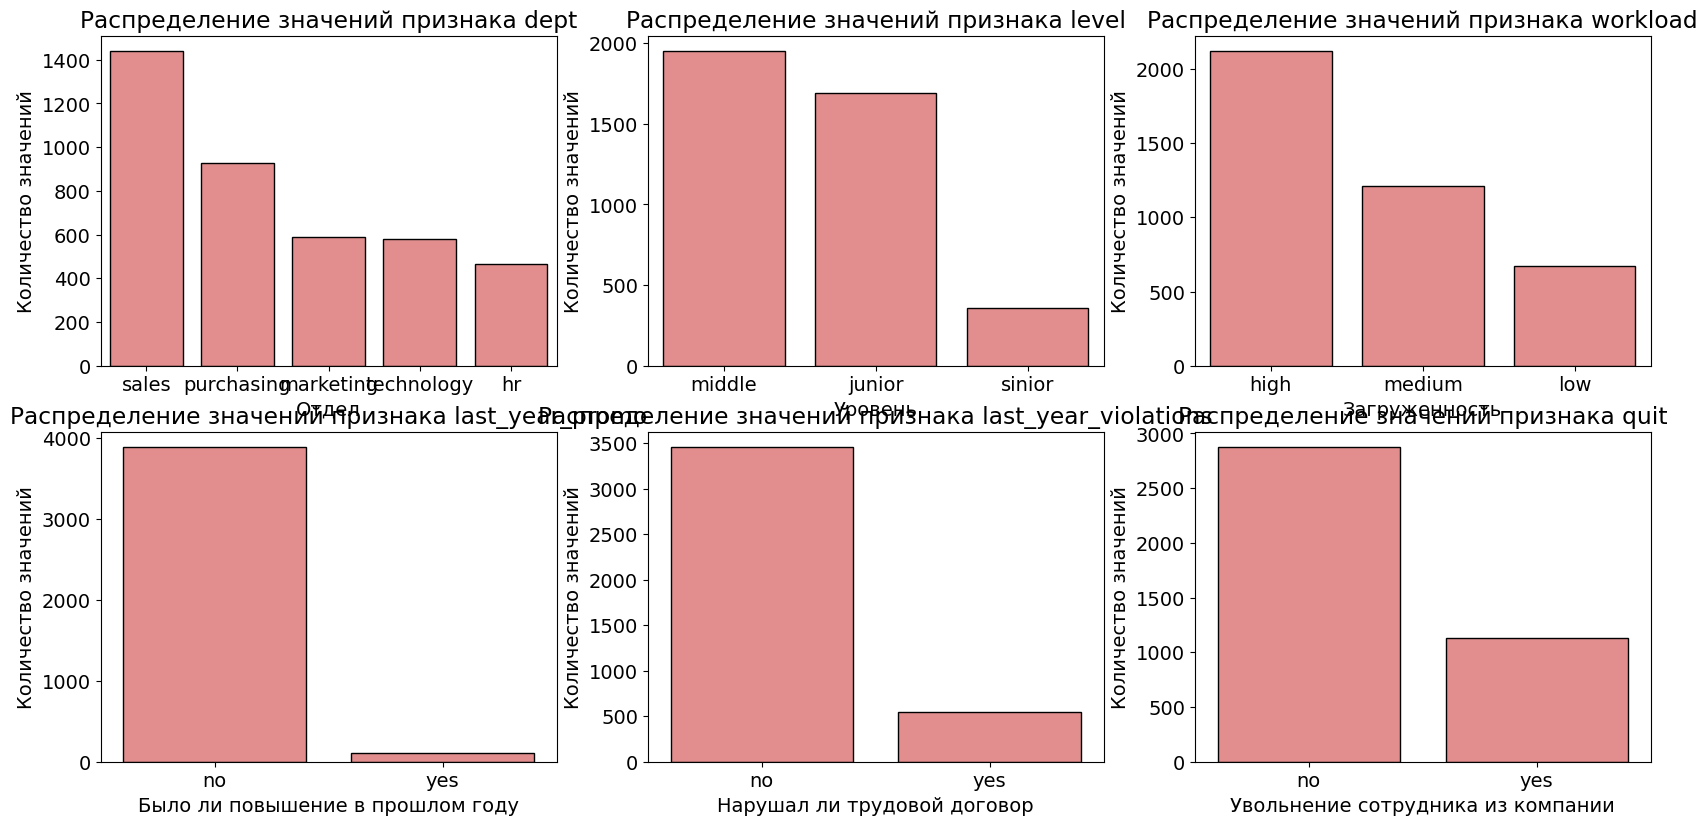

In [ ]:
fig = plt.figure(figsize=(20,30))

x_labels_2_1 = [
    'Отдел',
    'Уровень',
    'Загруженность',
    'Было ли повышение в прошлом году',
    'Нарушал ли трудовой договор',
    'Увольнение сотрудника из компании'
]
total_axes = len(train_quit_cat_cols)
subplt = 1
for n, c in enumerate(train_quit[train_quit_cat_cols]):
    ax = fig.add_subplot(total_axes, 3, subplt, xlabel=x_labels_2_1[n])
    sns.barplot(
        x=train_quit[c].unique(),
        y=train_quit[c].value_counts(dropna=False),
        color='lightcoral',
        ec='black'
    )
    subplt += 1
    plt.title(f'Распределение значений признака {c}')
    plt.ylabel('Количество значений')
pass

Распределение значения целевого признака в тестовой выборке:

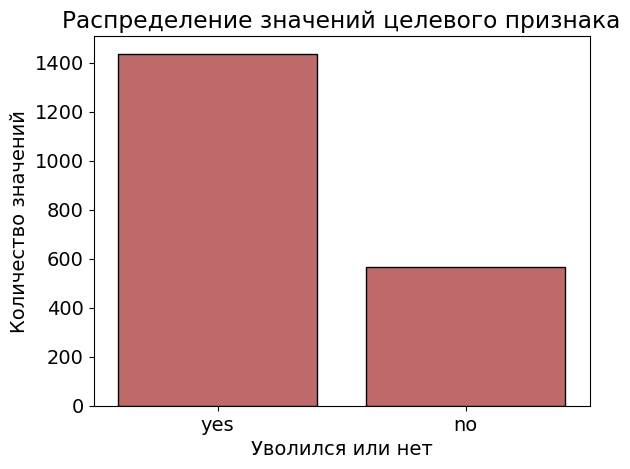

In [ ]:
sns.barplot(
        x=test_target_quit['quit'].unique(),
        y=test_target_quit['quit'].value_counts(dropna=False),
        color='indianred',
        ec='black'
    )
plt.title(f'Распределение значений целевого признака')
plt.ylabel('Количество значений')
plt.xlabel('Уволился или нет')
pass

Что нового в распределении данных?<br>
Целевой признак: увольнение сотрудника случается сильно реже его неувольнения.

Гистограммы и boxplot'ы количественных признаков, countplot'ы дискретных качественных DataFrame train_quit аналогичны распределениям тренировочных признаков в задаче №1.

#### Портрет уволившегося сотрудника

Распределение признака job_satisfaction_rate и salary для ушедших и оставшихся сотрудников с помощью графика KDE:

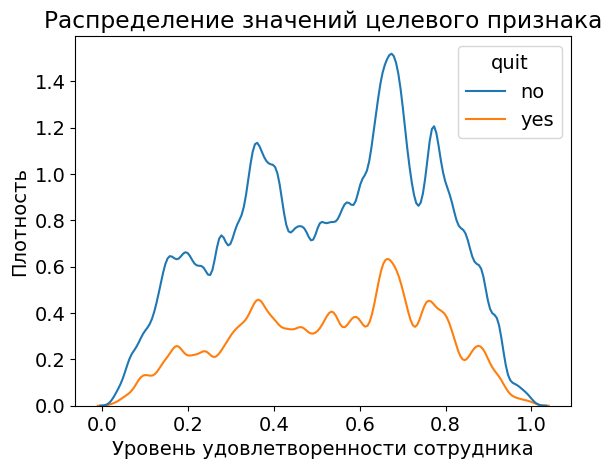

In [ ]:
train_quit['job_satisfaction_rate'] = train_job_satisfaction_rate['job_satisfaction_rate']
sns.kdeplot(train_quit, x='job_satisfaction_rate', hue='quit', bw_adjust=.25)
plt.title(f'Распределение значений целевого признака')
plt.ylabel('Плотность')
plt.xlabel('Уровень удовлетворенности сотрудника')

pass

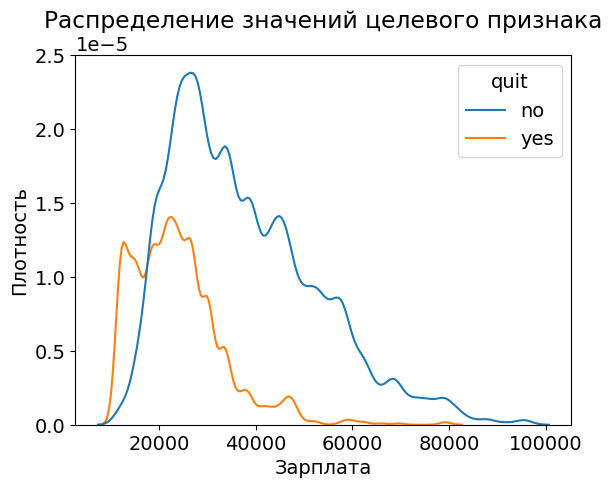

In [ ]:
sns.kdeplot(train_quit, x=train_quit['salary'], hue='quit', bw_adjust=.5)
plt.title(f'Распределение значений целевого признака')
plt.ylabel('Плотность')
plt.xlabel('Зарплата')

pass

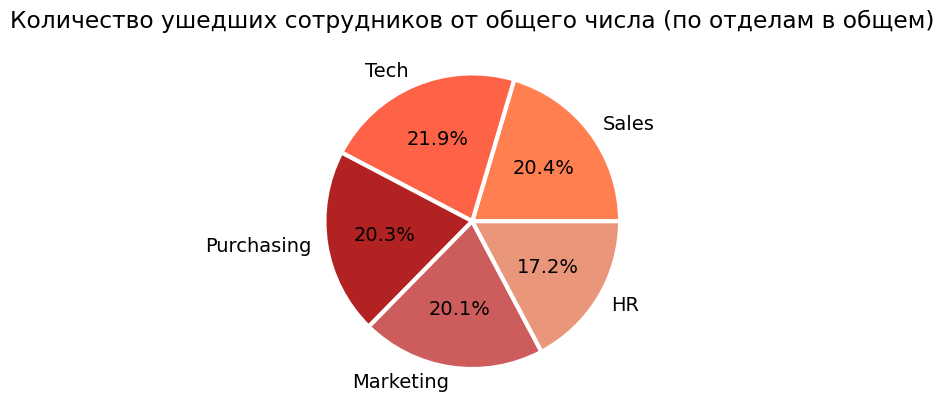

In [ ]:
labels = ['Sales', 'Tech', 'Purchasing', 'Marketing', 'HR']
pie_data = (train_quit.query('quit == "yes"')['dept'].value_counts() / train_quit.query('quit == "no"')['dept'].value_counts()
)

plt.pie(pie_data, autopct='%.1f%%', labels=labels, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, colors=['coral', 'tomato', 'firebrick', 'indianred', 'darksalmon'])

plt.title('Количество ушедших сотрудников от общего числа (по отделам в общем)')
plt.rc('font', size= 14)

pass

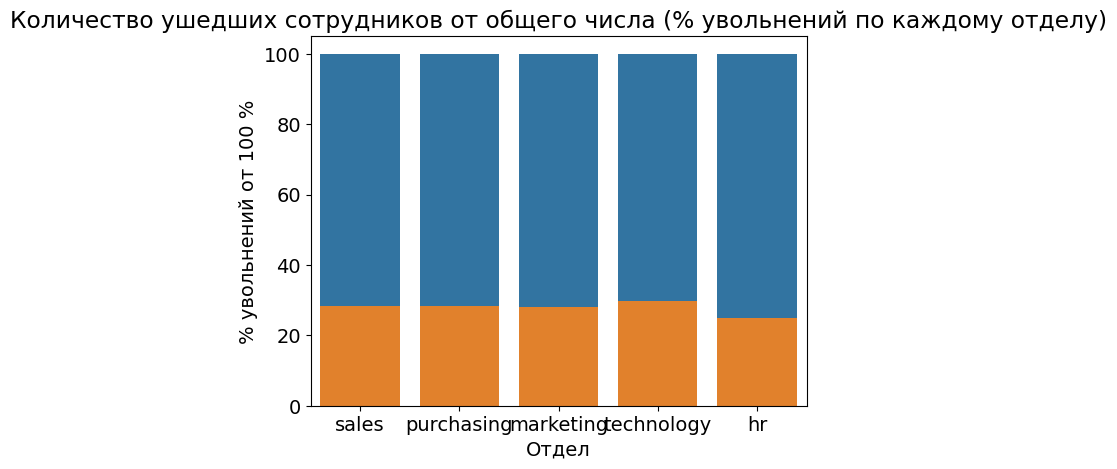

In [ ]:
sns.barplot(x=train_quit['dept'], y=100)
sns.barplot(train_quit.query('quit == "yes"').groupby(by=['dept'])['dept'].count() / train_quit.groupby(by=['dept'])['dept'].count() * 100)

plt.title(f'Количество ушедших сотрудников от общего числа (% увольнений по каждому отделу)')
plt.ylabel('% увольнений от 100 %')
plt.xlabel('Отдел')

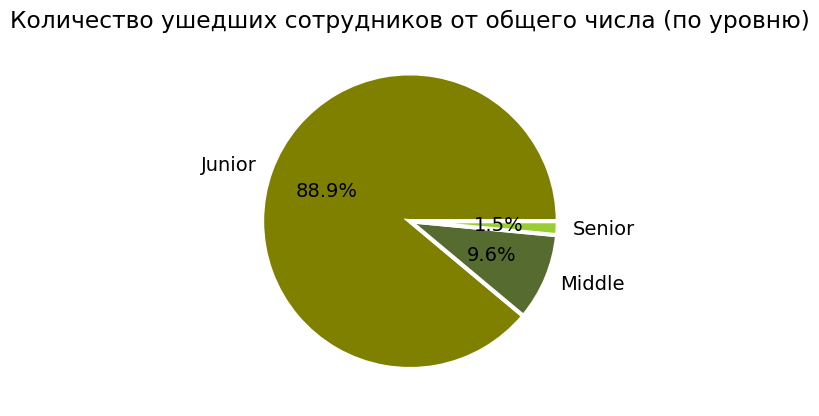

In [ ]:
labels = ['Junior', 'Middle', 'Senior']
pie_data = (train_quit.query('quit == "yes"')['level'].value_counts()
)

plt.pie(pie_data, autopct='%.1f%%', labels=labels, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, colors=['olive', 'darkolivegreen', 'yellowgreen'])

plt.title('Количество ушедших сотрудников от общего числа (по уровню)')
plt.rc('font', size= 14)

pass

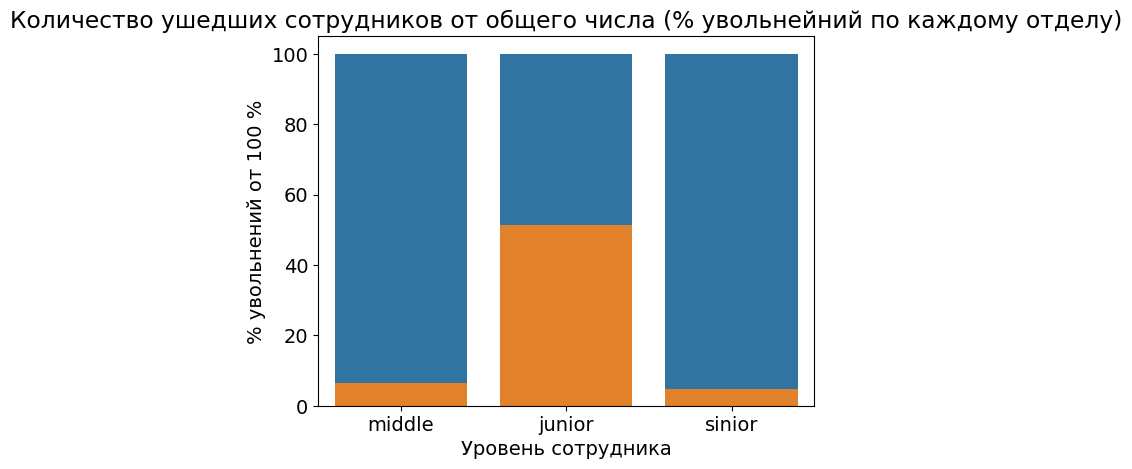

In [ ]:
sns.barplot(x=train_quit['level'], y=100)
sns.barplot(train_quit.query('quit == "yes"').groupby(by=['level'])['level'].count() / train_quit.groupby(by=['level'])['level'].count() * 100)

plt.title(f'Количество ушедших сотрудников от общего числа (% увольнейний по каждому отделу)')
plt.ylabel('% увольнений от 100 %')
plt.xlabel('Уровень сотрудника')

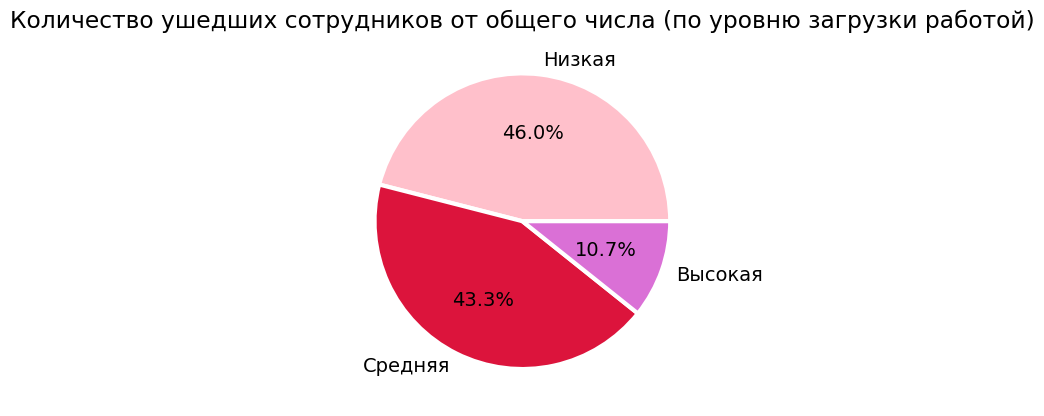

In [ ]:
labels = ['Низкая', 'Средняя', 'Высокая']
pie_data = (train_quit.query('quit == "yes"')['workload'].value_counts()
)

plt.pie(pie_data, autopct='%.1f%%', labels=labels, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, colors=['pink', 'crimson', 'orchid'])

plt.title('Количество ушедших сотрудников от общего числа (по уровню загрузки работой)')
plt.rc('font', size= 14)

pass

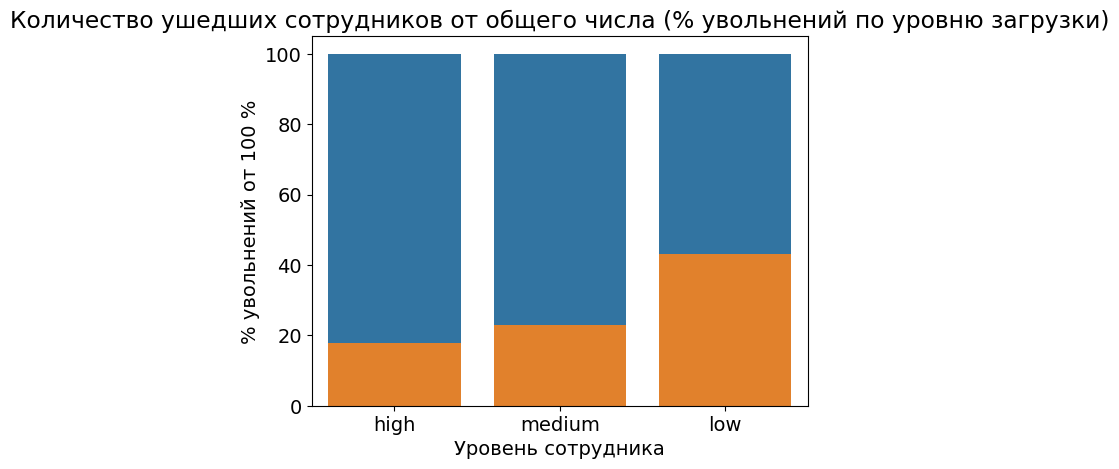

In [ ]:
sns.barplot(x=train_quit['workload'], y=100)
sns.barplot(train_quit.query('quit == "yes"').groupby(by=['workload'])['workload'].count() / train_quit.groupby(by=['workload'])['workload'].count() * 100)

plt.title(f'Количество ушедших сотрудников от общего числа (% увольнений по уровню загрузки)')
plt.ylabel('% увольнений от 100 %')
plt.xlabel('Уровень сотрудника')

In [ ]:
# Трудовой стаж в компании уволившегося сотрудника
train_quit.query('quit == "yes"')['employment_years'].value_counts()

In [ ]:
# Повышали ли уволившегося сотрудника за последний год
train_quit.query('quit == "yes"')['last_year_promo'].value_counts()

In [ ]:
# нарушал ли уволившийся сотрудник трудовой договор
train_quit.query('quit == "yes"')['last_year_violations'].value_counts()

In [ ]:
# Оценка сотрудника, который уволился, руководителем
train_quit.query('quit == "yes"')['supervisor_evaluation'].value_counts()

По графикам KDE видно, что распределения для ушедших и оставшихся сотрудников похожи, имеют 2 наиболее выраженных пика.<br>
Распределения значений зарплаты в разрезе целевого признака похожи, однако, есть дополнительный пик в quit='yes'; увольняющиеся люди чаще имеют более низкую з/п.

Больше всего увольняется специалистов уровня 'junior', имеющих низкую нагрузку. Чуть чаще это происходит в отделе IT. Чаще всего это человек с маленьким стажем работы в компании, не нарушавших трудовой договор подавляющее большинство уволившихся не повышали в течение последнего года. Оценка руководителя при этом - 3.

#### Корреляционный анализ

Используем коэффициент корреляции фи, который учитывает категориальные признаки, а также ненормальность распределения данных:

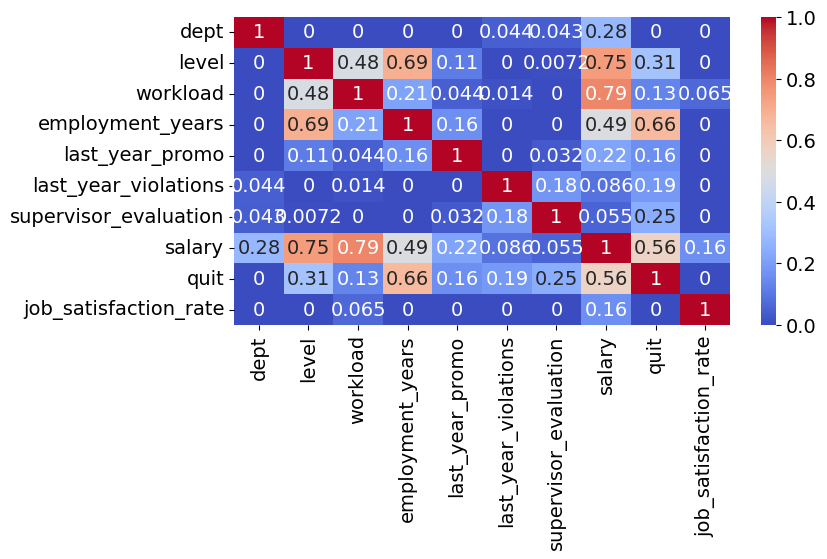

In [ ]:
fig = plt.figure(figsize=(8, 4))

sns.heatmap(
    train_quit.drop('id', axis=1).phik_matrix(interval_cols=train_quit_num_cols),
    cmap='coolwarm',
    annot=True,
    fmt='.2g'
)
pass

Как и в задаче №1 видим наиболее сильную корреляцию между workload и salary.
Целевой же признак больше всего связан с employment_years.

Видно, что сотрудник не увольняется / его не увольняют в случае, если стаж в компании выше; выше зарплата и выше  стаж.<br>
Также меньше увольняют(ся) при самой  высокой оценке сотрудника рабоотодателем.

Судя по матрицам корреляций, мультиколлинеарности не наблюдается (о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю). Ранее наблюдался повышенный VIF из-за workload  и salary. Проверим с новым целевым признаком. Проведем дополнительное исследование на мультиколлинеарность с помощью VIF (Variance Inflation Factor):

In [ ]:
# Используем quit в качестве целевой переменной
y, X = dmatrices('quit ~ dept+level+workload+last_year_promo+last_year_violations+employment_years+supervisor_evaluation+salary', \
                 data=train_quit, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

Картина стала похуже. Но пока не будем удалять признаки.

#### Выводы

Был проведен исследовательский анализ данных с учетом новой информации.

Новые наблюдения:
- Целевой признак: увольнение сотрудника случается сильно реже его неувольнения.

Как и в задаче №1 видим наиболее сильную корреляцию между workload и salary.
Целевой же признак больше всего связан с employment_years.

по диаграммам рассеяния признаков видно, сотрудник не увольняется / его не увольняют в случае, если стаж в компании выше; выше зарплата и выше  стаж.<br>
Также меньше увольняют(ся) при самой  высокой оценке сотрудника рабоотодателем.

Матрицы корреляций не показали мультиколлинеарности между признаками. Однако, дополнительное исследование на мультиколлинеарность с помощью VIF (Variance Inflation Factor) показало ее наличие.

Был составлен портрет уволившегося сотрудника:
Больше всего увольняется специалистов уровня 'junior', имеющих низкую нагрузку. Чуть чаще это происходит в отделе IT. Чаще всего это человек с маленьким стажем работы в компании, не нарушавших трудовой договор подавляющее большинство уволившихся не повышали в течение последнего года. Оценка руководителя при этом - 3.

### Добавление признака

Согласно условию задачи нужно добавить целевой признак из прошлой задачи. Он был добавлен на этапе исследовательского анализа:

In [ ]:
train_quit.shape

In [ ]:
test_features_new_2 = test_features_new
test_features_new_2['job_satisfaction_rate'] = y_test_pred
test_features_new_2.shape

In [ ]:
test_features_new_2

###  Подготовка данных

Добавим признак, созданный для задачи №1, в тренировочные данные:

In [ ]:
train_quit['supervisor_evaluation_sq'] = train_quit['supervisor_evaluation'] ** 2

train_quit_new = train_quit.drop('supervisor_evaluation', axis=1)
train_quit_new.shape

Объединим test_features и test_target_quit по id, чтобы посмотреть, одни и те же id использованы в этих данных или нет:

In [ ]:
test_features_plus_target_2 = test_features_new.merge(test_target_quit, on='id', how='left')
test_features_plus_target_2.shape

In [ ]:
# пропущенные значения те же, что и в задаче №1
test_features_plus_target_2.isna().sum()

In [ ]:
# создаём списки с названиями признаков
ohe_columns_2 = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns_2 = ['level', 'workload']
num_columns_2 = ['employment_years', 'supervisor_evaluation_sq', 'salary']

In [ ]:
# удалим столбец id, сделав из него индекс
train_quit_new = train_quit_new.set_index('id')
print('Количество дубликатов в тренировочной выборке:', train_job_satisfaction_rate_new.duplicated().sum())

test_features_plus_target_2 = test_features_plus_target_2.set_index('id')
print('Количество дубликатов в тренировочной выборке:', test_features_plus_target_2.duplicated().sum())

In [ ]:
# разбивка данных
X_train_2 = train_quit_new.drop('quit', axis=1)
y_train_2 = train_quit_new['quit']

X_test_2 = test_features_plus_target_2.drop('quit', axis=1)
y_test_2 = test_features_plus_target_2['quit']

In [ ]:
display(X_train_2.shape)
display(y_train_2.shape)
display(X_test_2.shape)
display(y_test_2.shape)

### Обучение модели

In [ ]:
# кодируем целевой признак
label_encoder = LabelEncoder()

label_encoder.fit(y_train_2)
y_train_2 = label_encoder.transform(y_train_2)
y_test_2 = label_encoder.transform(y_test_2)

In [ ]:
# создаём общий пайплайн для подготовки данных
data_preprocessor_2 = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns_2),
     ('ord', ord_pipe, ord_columns_2),
     ('num', StandardScaler(), num_columns_2)
    ],
    remainder='passthrough'
)

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final_2 = Pipeline(
    [
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression())
    ]
)

In [ ]:
# создадим список для перебора гиперпараметров
param_grid_2 = [
        # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1',
            )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

        # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,40),
        'models__max_features': range(2,40),
        'models__min_samples_split': range(2, 40),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

        # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'models__metric': ['euclidean', 'manhattan'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [ ]:
%%time

randomized_search_2 = RandomizedSearchCV(
    pipe_final_2,
    param_grid_2,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=10,
)
randomized_search_2.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n\n', randomized_search_2.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации:', randomized_search_2.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred_2 = randomized_search_2.predict_proba(X_test_2)[:,1]
print(f'Метрика SMAPE на тестовой выборке: {roc_auc_score(y_test_2, y_test_pred_2)}', '\n')

In [ ]:
# вывод лучшей модели
the_best_model = randomized_search.best_estimator_['models']

In [ ]:
# предобработка данных и вывод имен новых признаков после кодирования ohe. Создание DataFrame
X_train_prepr = pd.DataFrame(
    randomized_search.best_estimator_['preprocessor'].fit_transform(X_train),
    columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()
)

X_test_prepr = pd.DataFrame(
    randomized_search.best_estimator_['preprocessor'].transform(X_test),
    columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()
)

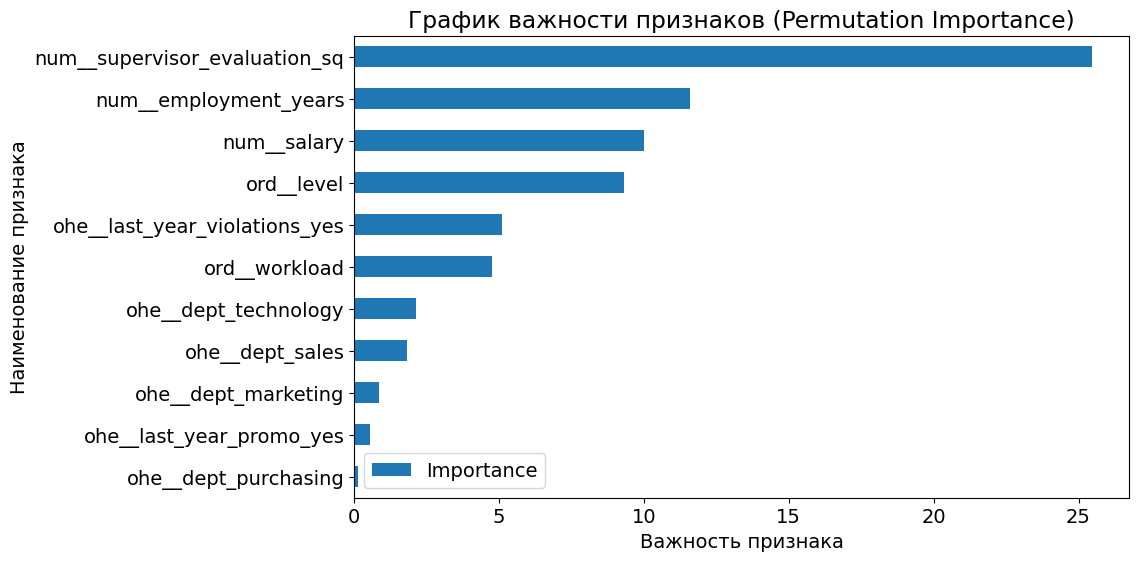

In [ ]:
permutation = permutation_importance(the_best_model, X_test_prepr, y_test, scoring=smape_score)

#X_test_prepr.columns[selector.get_support(indices=True)]
feature_importance = pd.DataFrame({'Feature': X_test_prepr.columns, 'Importance': permutation['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

plt.title(f'График важности признаков (Permutation Importance)')
plt.xlabel('Важность признака')
plt.ylabel('Наименование признака')

In [ ]:
# используем Explainer. Во избежание ошибки размерности массива используем shap_values[...,0]
explainer = shap.Explainer(the_best_model)
shap_values = explainer(X_test_prepr)
#explainer.feature_names = randomized_search.best_estimator_['preprocessor'].get_feature_names_out()

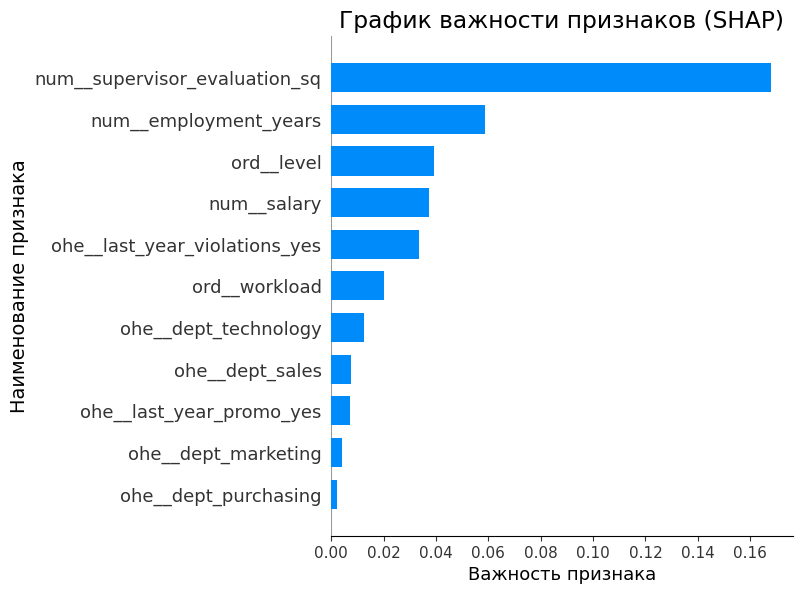

In [ ]:
shap.summary_plot(shap_values, plot_type='bar', show=False)

fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel("Важность признака")
ax.set_ylabel("Наименование признака")
ax.set_title('График важности признаков (SHAP)')

Проверка модели на адекватность с помощью DummyClassifier:

In [ ]:
X_train_for_dummy = pd.DataFrame(data_preprocessor_2.fit_transform(X_train_2))
X_test_for_dummy = pd.DataFrame(data_preprocessor_2.transform(X_test_2))

# создание и обучение модели DummyClassifier
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train_for_dummy, y_train_2)

dummy_model_proba = dummy_model.predict_proba(X_test_for_dummy)
#dummy_model_preds = dummy_model.predict(X_test_for_dummy)

dummy_acc = roc_auc_score(y_test_2, dummy_model_proba[:,1])
print('ROC-AUC =', round(dummy_acc, 2))

'''dummy_acc = accuracy_score(y_test, dummy_model_preds)
print('Dummy Accuracy =', round(dummy_acc,2))'''
pass

Метрика ROC-AUC нашей лучшей модели превосходит метрику baseline модели DummyClassifier, которая по умолчанию всегда предсказывает наиболее часто встречающийся класс.

### Выводы по второй части проекта


Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.








С целью решения задачи №2 была проведена предобработка новых полученных данных, исследовательский и корреляционный анализ. Далее проведена подготовка данных к моделированию с помощью пайплайна, обучено 3 модели с перебором гиперпараметров. Далее на основе метрики ROC-AUC (на тестовой выборке имеет значение > 0.91) выбрана лучшая из них.

Лучше всего с задачей справилась модель **Дерево решений (DecisionTreeClassifier)**. Ее параметры: max_depth=33, max_features=28 min_samples_split=20, random_state=42.

Анализ важности признаков с помощью SimpleImputer и SHAP значений дал ценную информацию о том, на какие признаки стоит обратить бОльшее внимание в дальнейшем.


Данная модель показала хорошую требуемую метрику ROC-AUC (она устойчива к выбросам) с учетом того, что целевой признак несбалансирован.

## Итоговые выводы

1. **Описание задачи**<br>
В данном проекте решены две главные задачи: предсказание уровня удовлетворенности сотрудников и их увольнения из компании. Ответы на эти вопросы помогут кадровому отделу определить лояльность сотрудников.
<br><br><br>
2. **Описание этапов работы** <br>
а) **Предобработка данных**<br>
Оценка исходных данных на наличие пропусков, дубликатов, исправление их недостатков.<br><br>
б) **Исследовательский анализ данных**<br>
Изучение данных на предмет распределения признаков, их взаимосвязи и корреляции, поиск выбросов и аномалий.<br><br>
в) **Подготовка данных к машинному обучению** <br>
Разбивка данных, обработка пропущенных значений, кодирование категориальных признаков (включая целевой во второй задаче), масштабирование количественных признаков.<br><br>
г) **Обучение и настройка моделей**<br>
Инициализация моделей МО, подбор оптимальных гиперпараметров.<br><br>
д) **Оценка лучшей модели**<br>
Оценка с помощью отдельной метрики для каждой конкретной задачи, выявление наиболее значимых признаков.<br>
<br><br>
3. **Выводы и дополнительные предложения для бизнеса**<br>
а) Задача №1. Предсказание уровня удовлетворенности сотрудника<br>
Лучшая модель: **Дерево решений (DecisionTreeClassifier)**. <br>
Ее параметры: max_depth=33, max_features=28 min_samples_split=20, random_state=42.<br><br>
б) Задача №2. Предсказание увольнения сотрудника<br>
Лучшая модель:  **Дерево решений DecisionTreeRegressor**.<br>
Ее параметры: max_depth=32, max_features=19, min_samples_split=12 random_state=42.<br><br>
в) Предложения для бизнеса<br>
Использование моделей в отделе кадров поможет в определении сотрудников, которые удовлетворены работой, не удовлетворены или находятся 'в пограничном' состоянии. Такая информация вкупе с предсказанием события 'Сотрудник уволится' позволит провести мероприятия по повышению лояльности сотрудника или же поставит вопрос о необходимости, целесообразности пребывания сотрудника в компании. Это поможет избежать финансовых потерь, например, из-за низкого КПД работника, снизит отток кадров. <br>

Был составлен портрет уволившегося сотрудника:
Больше всего увольняется специалистов уровня 'junior', имеющих низкую нагрузку. Чуть чаще это происходит в отделе IT. Чаще всего это человек с маленьким стажем работы в компании, не нарушавших трудовой договор подавляющее большинство уволившихся не повышали в течение последнего года. Оценка руководителя при этом - 3.

Для улучшения работы моделей МО бизнесу рекомендуется проводить постоянный мониторинг признаков модели. Это позволит увеличить базу данных, модели будут лучше обучаться, делать облее точные предсказания. Однако, мониторинг не должен мешать кадрам работать, не должен быть назойливым, не должен вызывать чувтство чрезмерного контроля. Хотя почти все признаки не  требуют вмешательства в работу сотрудников.